# ZOMATO RESTAURANTS ANALYSIS & PREDICTIONS

## Installing neccessary packages

In [1]:
!pip install geopy

In [2]:
!pip install wordcloud
#for accessing geographical data have to use library geopy
!pip install geopy
# need to use heat maps
!pip install folium
!pip install plotly

## Importing Libraries

In [3]:
import pandas as pd
import numpy as np

from wordcloud import WordCloud, STOPWORDS
from geopy.geocoders import Nominatim 
#Nominatim is your search engine for your open state metadata; 
#So whateven name state place you are gonna send to it will return its latitude and longitude
import folium                                 #folium module is used for heatmaps
from folium.plugins import HeatMap

import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt    
import seaborn as sns 
import plotly.express as px

from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

## Loading Dataset(s)

In [4]:
df=pd.read_csv('zomato.csv')

## Descriptive Analysis

In [5]:
df.head()

url  \
0  https://www.zomato.com/bangalore/jalsa-banasha...   
1  https://www.zomato.com/bangalore/spice-elephan...   
2  https://www.zomato.com/SanchurroBangalore?cont...   
3  https://www.zomato.com/bangalore/addhuri-udupi...   
4  https://www.zomato.com/bangalore/grand-village...   

                                             address                   name  \
0  942, 21st Main Road, 2nd Stage, Banashankari, ...                  Jalsa   
1  2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...         Spice Elephant   
2  1112, Next to KIMS Medical College, 17th Cross...        San Churro Cafe   
3  1st Floor, Annakuteera, 3rd Stage, Banashankar...  Addhuri Udupi Bhojana   
4  10, 3rd Floor, Lakshmi Associates, Gandhi Baza...          Grand Village   

  online_order book_table   rate  votes                             phone  \
0          Yes        Yes  4.1/5    775    080 42297555\r\n+91 9743772233   
1          Yes         No  4.1/5    787                      080 41714161   
2          Yes         No  3.8/5    918                    +91 9663487993   
3           No         No  3.7/5     88                    +91 9620009302   
4           No         No  3.8/5    166  +91 8026612447\r\n+91 9901210005   

       location            rest_type  \
0  Banashankari        Casual Dining   
1  Banashankari        Casual Dining   
2  Banashankari  Cafe, Casual Dining   
3  Banashankari          Quick Bites   
4  Basavanagudi        Casual Dining   

                                          dish_liked  \
0  Pasta, Lunch Buffet, Masala Papad, Paneer Laja...   
1  Momos, Lunch Buffet, Chocolate Nirvana, Thai G...   
2  Churros, Cannelloni, Minestrone Soup, Hot Choc...   
3                                        Masala Dosa   
4                                Panipuri, Gol Gappe   

                         cuisines approx_cost(for two people)  \
0  North Indian, Mughlai, Chinese                         800   
1     Chinese, North Indian, Thai                         800   
2          Cafe, Mexican, Italian                         800   
3      South Indian, North Indian                         300   
4        North Indian, Rajasthani                         600   

                                        reviews_list menu_item  \
0  [('Rated 4.0', 'RATED\n  A beautiful place to ...        []   
1  [('Rated 4.0', 'RATED\n  Had been here for din...        []   
2  [('Rated 3.0', "RATED\n  Ambience is not that ...        []   
3  [('Rated 4.0', "RATED\n  Great food and proper...        []   
4  [('Rated 4.0', 'RATED\n  Very good restaurant ...        []   

  listed_in(type) listed_in(city)  
0          Buffet    Banashankari  
1          Buffet    Banashankari  
2          Buffet    Banashankari  
3          Buffet    Banashankari  
4          Buffet    Banashankari

In [6]:
df.shape

(51717, 17)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

In [8]:
df.describe()

votes
count  51717.000000
mean     283.697527
std      803.838853
min        0.000000
25%        7.000000
50%       41.000000
75%      198.000000
max    16832.000000

## Data Cleaning

### Calculating null percentage of every column

In [9]:
for col in df.columns.values:
    nulls_summation=df[col].isnull().sum()
    nulls_percent=(nulls_summation/df.shape[0])*100 #gives the percentage of nulls in each column = (summation/no of records(550068))*100
    print(f'{col} = {nulls_percent}%')

url = 0.0%
address = 0.0%
name = 0.0%
online_order = 0.0%
book_table = 0.0%
rate = 15.033741322969234%
votes = 0.0%
phone = 2.335789005549432%
location = 0.04060560357329312%
rest_type = 0.438927238625597%
dish_liked = 54.29162557766305%
cuisines = 0.08701200765705668%
approx_cost(for two people) = 0.669025658874258%
reviews_list = 0.0%
menu_item = 0.0%
listed_in(type) = 0.0%
listed_in(city) = 0.0%


In [10]:
df.isna().sum() 

url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                            7775
votes                              0
phone                           1208
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

#### **dish_liked column has 22435 Null value almost half of total rows.**

### Checking for unique values in certain columns

In [11]:
df.nunique()

url                            51717
address                        11495
name                            8792
online_order                       2
book_table                         2
rate                              64
votes                           2328
phone                          14926
location                          93
rest_type                         93
dish_liked                      5271
cuisines                        2723
approx_cost(for two people)       70
reviews_list                   22513
menu_item                       9098
listed_in(type)                    7
listed_in(city)                   30
dtype: int64

In [12]:
 df['rest_type'].unique() #resturant type

array(['Casual Dining', 'Cafe, Casual Dining', 'Quick Bites',
       'Casual Dining, Cafe', 'Cafe', 'Quick Bites, Cafe',
       'Cafe, Quick Bites', 'Delivery', 'Mess', 'Dessert Parlor',
       'Bakery, Dessert Parlor', 'Pub', 'Bakery', 'Takeaway, Delivery',
       'Fine Dining', 'Beverage Shop', 'Sweet Shop', 'Bar',
       'Beverage Shop, Quick Bites', 'Confectionery',
       'Quick Bites, Beverage Shop', 'Dessert Parlor, Sweet Shop',
       'Bakery, Quick Bites', 'Sweet Shop, Quick Bites', 'Kiosk',
       'Food Truck', 'Quick Bites, Dessert Parlor',
       'Beverage Shop, Dessert Parlor', 'Takeaway', 'Pub, Casual Dining',
       'Casual Dining, Bar', 'Dessert Parlor, Beverage Shop',
       'Quick Bites, Bakery', 'Dessert Parlor, Quick Bites',
       'Microbrewery, Casual Dining', 'Lounge', 'Bar, Casual Dining',
       'Food Court', 'Cafe, Bakery', nan, 'Dhaba',
       'Quick Bites, Sweet Shop', 'Microbrewery',
       'Food Court, Quick Bites', 'Pub, Bar', 'Casual Dining, Pub',
      

In [13]:
df['cuisines'].unique()

array(['North Indian, Mughlai, Chinese', 'Chinese, North Indian, Thai',
       'Cafe, Mexican, Italian', ...,
       'North Indian, Street Food, Biryani', 'Chinese, Mughlai',
       'North Indian, Chinese, Arabian, Momos'], dtype=object)

In [14]:
df['menu_item'].unique()

array(['[]',
       "['Chocolate Fantasy (Pack Of 5)', 'Pan Cake (Pack Of 6)', 'Gulab Jamun (Pack Of 10)', 'Gulkand Shot (Pack Of 5)', 'Chocolate Decadence (Pack of 2)', 'CheeseCake (Pack Of 2)', 'Red Velvet Slice Cake (Pack of 2)', 'Red Velvet Slice Cake & Cheese Cake (Pack of 2)', 'Red Velvet Slice Cake & Chocolate Decadence Cake (Pack of 2)', 'Hazelnut Brownie (Pack of 2)', 'Moments', 'Red Velvet Cake With Butter Cream Frosting (750 Gm)', 'Red Velvet Slice Cake (Pack of 2)', 'Red Velvet Slice Cake & Cheese Cake (Pack of 2)', 'Red Velvet Slice Cake & Chocolate Decadence Cake (Pack of 2)', 'Red Velvet Slice Cake (Pack of 1)', 'Valentine Red Velvet Jar', 'Valentine Chocolate Jar', 'Valentines Jar Combo', 'Pink Guava 500 ML', 'Oreo Vanilla 500 ML', 'Cookie Crumble 500 ML', 'Chocolate Fantasy', 'Gulkand-E-Bahar', 'Pan Cake', 'Hazelnut Brownie (Pack Of 1)', 'Gulab Jamun (Pack Of 2)', 'Plum Cake', 'Red Velvet Cake With Butter Cream Frosting (750 Gm)', 'Chocolate Mud Cake (700 Gms)', 'Chees

In [15]:
df['online_order'].unique()

array(['Yes', 'No'], dtype=object)

In [16]:
df['listed_in(type)'].unique() #type of meal

array(['Buffet', 'Cafes', 'Delivery', 'Desserts', 'Dine-out',
       'Drinks & nightlife', 'Pubs and bars'], dtype=object)

### Checking for duplicate values in the dataset

In [17]:
duplicate = df[df.duplicated()]
duplicate

Empty DataFrame
Columns: [url, address, name, online_order, book_table, rate, votes, phone, location, rest_type, dish_liked, cuisines, approx_cost(for two people), reviews_list, menu_item, listed_in(type), listed_in(city)]
Index: []

### Checking all location related columns

In [18]:
df['listed_in(city)'].unique()

array(['Banashankari', 'Bannerghatta Road', 'Basavanagudi', 'Bellandur',
       'Brigade Road', 'Brookefield', 'BTM', 'Church Street',
       'Electronic City', 'Frazer Town', 'HSR', 'Indiranagar',
       'Jayanagar', 'JP Nagar', 'Kalyan Nagar', 'Kammanahalli',
       'Koramangala 4th Block', 'Koramangala 5th Block',
       'Koramangala 6th Block', 'Koramangala 7th Block', 'Lavelle Road',
       'Malleshwaram', 'Marathahalli', 'MG Road', 'New BEL Road',
       'Old Airport Road', 'Rajajinagar', 'Residency Road',
       'Sarjapur Road', 'Whitefield'], dtype=object)

In [19]:
df['location'].unique()

array(['Banashankari', 'Basavanagudi', 'Mysore Road', 'Jayanagar',
       'Kumaraswamy Layout', 'Rajarajeshwari Nagar', 'Vijay Nagar',
       'Uttarahalli', 'JP Nagar', 'South Bangalore', 'City Market',
       'Nagarbhavi', 'Bannerghatta Road', 'BTM', 'Kanakapura Road',
       'Bommanahalli', nan, 'CV Raman Nagar', 'Electronic City', 'HSR',
       'Marathahalli', 'Sarjapur Road', 'Wilson Garden', 'Shanti Nagar',
       'Koramangala 5th Block', 'Koramangala 8th Block', 'Richmond Road',
       'Koramangala 7th Block', 'Jalahalli', 'Koramangala 4th Block',
       'Bellandur', 'Whitefield', 'East Bangalore', 'Old Airport Road',
       'Indiranagar', 'Koramangala 1st Block', 'Frazer Town', 'RT Nagar',
       'MG Road', 'Brigade Road', 'Lavelle Road', 'Church Street',
       'Ulsoor', 'Residency Road', 'Shivajinagar', 'Infantry Road',
       'St. Marks Road', 'Cunningham Road', 'Race Course Road',
       'Commercial Street', 'Vasanth Nagar', 'HBR Layout', 'Domlur',
       'Ejipura', 'Jeevan 

In [20]:
df['address'].unique()

array(['942, 21st Main Road, 2nd Stage, Banashankari, Bangalore',
       '2nd Floor, 80 Feet Road, Near Big Bazaar, 6th Block, Kathriguppe, 3rd Stage, Banashankari, Bangalore',
       '1112, Next to KIMS Medical College, 17th Cross, 2nd Stage, Banashankari, Bangalore',
       ...,
       'Cessna Business Park, Sarjapur Ã\x83Â\x83Ã\x82Â\x83Ã\x83Â\x82Ã\x82Â\x83Ã\x83Â\x83Ã\x82Â\x82Ã\x83Â\x82Ã\x82Â\x82Ã\x83Â\x83Ã\x82Â\x83Ã\x83Â\x82Ã\x82Â\x82Ã\x83Â\x83Ã\x82Â\x82Ã\x83Â\x82Ã\x82Â\x96 Marathahalli Outer Ring Road, Kadubeesanahalli, Bellandur Post, Bengaluru, Karnataka',
       '44, Kodigehalli to Hoodi Main Road, Mahadevapura Post, KR Puram, Bangalore',
       '139/C1, Next To GR Tech Park, Pattandur Agrahara, ITPL, Main Road, Whitefield, Bangalore'],
      dtype=object)

**Here, we can see that 3 column are representing same information, so just dropping column which are not important.**

**- we are going to keep the location column and drop the address and listed_in(city) columns**

**- columns url , phone ,review_list, menu_item are unneccessary and needs to be dropped.**

### Dropping unnecessary columns

In [21]:
#Shape of the dataframe before dropping unnecessary columns
df.shape

(51717, 17)

#### The columns address, location and listed_in(city) share similar information. Thereby, dropping address and listed_in(city).

In [22]:
column_to_drop = ['address','listed_in(city)']
df.drop(columns=column_to_drop, axis=1,inplace=True)

In [23]:
# drop unnecessary columns
column_to_drop = ['url','phone','reviews_list','menu_item']
df.drop(columns=column_to_drop, axis=1,inplace=True)

In [24]:
#Shape of the dataframe after dropping unnecessary columns
df.shape

(51717, 11)

In [25]:
df.head()

name online_order book_table   rate  votes      location  \
0                  Jalsa          Yes        Yes  4.1/5    775  Banashankari   
1         Spice Elephant          Yes         No  4.1/5    787  Banashankari   
2        San Churro Cafe          Yes         No  3.8/5    918  Banashankari   
3  Addhuri Udupi Bhojana           No         No  3.7/5     88  Banashankari   
4          Grand Village           No         No  3.8/5    166  Basavanagudi   

             rest_type                                         dish_liked  \
0        Casual Dining  Pasta, Lunch Buffet, Masala Papad, Paneer Laja...   
1        Casual Dining  Momos, Lunch Buffet, Chocolate Nirvana, Thai G...   
2  Cafe, Casual Dining  Churros, Cannelloni, Minestrone Soup, Hot Choc...   
3          Quick Bites                                        Masala Dosa   
4        Casual Dining                                Panipuri, Gol Gappe   

                         cuisines approx_cost(for two people) listed_in(type)  
0  North Indian, Mughlai, Chinese                         800          Buffet  
1     Chinese, North Indian, Thai                         800          Buffet  
2          Cafe, Mexican, Italian                         800          Buffet  
3      South Indian, North Indian                         300          Buffet  
4        North Indian, Rajasthani                         600          Buffet

### Fixing the values of approx_cost( for two people), changing its dtype and renaming it

In [26]:
df['approx_cost(for two people)'].unique()

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '900', '200', '750', '150', '850', '100', '1,200', '350', '250',
       '950', '1,000', '1,500', '1,300', '199', '80', '1,100', '160',
       '1,600', '230', '130', '50', '190', '1,700', nan, '1,400', '180',
       '1,350', '2,200', '2,000', '1,800', '1,900', '330', '2,500',
       '2,100', '3,000', '2,800', '3,400', '40', '1,250', '3,500',
       '4,000', '2,400', '2,600', '120', '1,450', '469', '70', '3,200',
       '60', '560', '240', '360', '6,000', '1,050', '2,300', '4,100',
       '5,000', '3,700', '1,650', '2,700', '4,500', '140'], dtype=object)

#### approx_cost(for two people) should be in float but due to some special characters ',' it isn't!

In [27]:
df['approx_cost(for two people)']=df['approx_cost(for two people)'].astype(str).apply(lambda x:x.replace(',',''))

In [28]:
df['approx_cost(for two people)'].unique()    #comma is removed

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '900', '200', '750', '150', '850', '100', '1200', '350', '250',
       '950', '1000', '1500', '1300', '199', '80', '1100', '160', '1600',
       '230', '130', '50', '190', '1700', 'nan', '1400', '180', '1350',
       '2200', '2000', '1800', '1900', '330', '2500', '2100', '3000',
       '2800', '3400', '40', '1250', '3500', '4000', '2400', '2600',
       '120', '1450', '469', '70', '3200', '60', '560', '240', '360',
       '6000', '1050', '2300', '4100', '5000', '3700', '1650', '2700',
       '4500', '140'], dtype=object)

In [29]:
# converting string to float type data
df['approx_cost(for two people)']=df['approx_cost(for two people)'].astype(float)
df['approx_cost(for two people)'].dtype

dtype('float64')

In [30]:
# rename 'approx_cost(for two people)' to 'average_cost'
df.rename(columns={'approx_cost(for two people)': 'average_cost'}, inplace=True)

In [31]:
df.head(1)

name online_order book_table   rate  votes      location      rest_type  \
0  Jalsa          Yes        Yes  4.1/5    775  Banashankari  Casual Dining   

                                          dish_liked  \
0  Pasta, Lunch Buffet, Masala Papad, Paneer Laja...   

                         cuisines  average_cost listed_in(type)  
0  North Indian, Mughlai, Chinese         800.0          Buffet

### Fixing the values of rate and changing its dtype

In [32]:
df['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', nan, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [33]:
df['rate']=df['rate'].astype(str).apply(lambda x:x.split('/')[0])

In [34]:
df['rate'].unique().dtype

dtype('O')

In [35]:
df['rate'].unique()

array(['4.1', '3.8', '3.7', '3.6', '4.6', '4.0', '4.2', '3.9', '3.1',
       '3.0', '3.2', '3.3', '2.8', '4.4', '4.3', 'NEW', '2.9', '3.5',
       'nan', '2.6', '3.8 ', '3.4', '4.5', '2.5', '2.7', '4.7', '2.4',
       '2.2', '2.3', '3.4 ', '-', '3.6 ', '4.8', '3.9 ', '4.2 ', '4.0 ',
       '4.1 ', '3.7 ', '3.1 ', '2.9 ', '3.3 ', '2.8 ', '3.5 ', '2.7 ',
       '2.5 ', '3.2 ', '2.6 ', '4.5 ', '4.3 ', '4.4 ', '4.9', '2.1',
       '2.0', '1.8', '4.6 ', '4.9 ', '3.0 ', '4.8 ', '2.3 ', '4.7 ',
       '2.4 ', '2.1 ', '2.2 ', '2.0 ', '1.8 '], dtype=object)

In [36]:
# df['rate']=df['rate'].astype(str).apply(lambda x:x.replace('NEW',0))
# df['rate']=df['rate'].astype(str).apply(lambda x:x.replace('-',0))
df['rate'].replace('-',0,inplace=True)    #inplace is used for updating the value
df['rate'].replace('NEW',0,inplace=True)

In [37]:
df['rate'].unique()

array(['4.1', '3.8', '3.7', '3.6', '4.6', '4.0', '4.2', '3.9', '3.1',
       '3.0', '3.2', '3.3', '2.8', '4.4', '4.3', 0, '2.9', '3.5', 'nan',
       '2.6', '3.8 ', '3.4', '4.5', '2.5', '2.7', '4.7', '2.4', '2.2',
       '2.3', '3.4 ', '3.6 ', '4.8', '3.9 ', '4.2 ', '4.0 ', '4.1 ',
       '3.7 ', '3.1 ', '2.9 ', '3.3 ', '2.8 ', '3.5 ', '2.7 ', '2.5 ',
       '3.2 ', '2.6 ', '4.5 ', '4.3 ', '4.4 ', '4.9', '2.1', '2.0', '1.8',
       '4.6 ', '4.9 ', '3.0 ', '4.8 ', '2.3 ', '4.7 ', '2.4 ', '2.1 ',
       '2.2 ', '2.0 ', '1.8 '], dtype=object)

In [38]:
df['rate']=df['rate'].astype(float)
df['rate'].dtype

dtype('float64')

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             51717 non-null  object 
 1   online_order     51717 non-null  object 
 2   book_table       51717 non-null  object 
 3   rate             43942 non-null  float64
 4   votes            51717 non-null  int64  
 5   location         51696 non-null  object 
 6   rest_type        51490 non-null  object 
 7   dish_liked       23639 non-null  object 
 8   cuisines         51672 non-null  object 
 9   average_cost     51371 non-null  float64
 10  listed_in(type)  51717 non-null  object 
dtypes: float64(2), int64(1), object(8)
memory usage: 4.3+ MB


In [40]:
for col in df.columns.values:
    nulls_summation=df[col].isnull().sum()
    nulls_percent=(nulls_summation/df.shape[0])*100 #gives the percentage of nulls in each column = (summation/no of records(550068))*100
    print(f'{col} = {nulls_percent}%')

name = 0.0%
online_order = 0.0%
book_table = 0.0%
rate = 15.033741322969234%
votes = 0.0%
location = 0.04060560357329312%
rest_type = 0.438927238625597%
dish_liked = 54.29162557766305%
cuisines = 0.08701200765705668%
average_cost = 0.669025658874258%
listed_in(type) = 0.0%


In [41]:
df.isna().sum()

name                   0
online_order           0
book_table             0
rate                7775
votes                  0
location              21
rest_type            227
dish_liked         28078
cuisines              45
average_cost         346
listed_in(type)        0
dtype: int64

**Now, it can be seen that the nan values have increased in rate column from 7775 to 10052 as some wierd values were converted to NaN.**

In [42]:
#Shape before removing any records on the basis of NaN values
df.shape

(51717, 11)

### Filling or removing NaN values from columns

In [43]:
df['rate'].unique()

array([4.1, 3.8, 3.7, 3.6, 4.6, 4. , 4.2, 3.9, 3.1, 3. , 3.2, 3.3, 2.8,
       4.4, 4.3, 0. , 2.9, 3.5, nan, 2.6, 3.4, 4.5, 2.5, 2.7, 4.7, 2.4,
       2.2, 2.3, 4.8, 4.9, 2.1, 2. , 1.8])

In [44]:
df['rate'].value_counts()

3.9    3972
3.8    3873
3.7    3821
3.6    3316
4.0    3183
4.1    2948
3.5    2784
3.4    2476
3.3    2310
0.0    2277
4.2    2184
3.2    1873
4.3    1693
3.1    1561
4.4    1147
3.0    1023
2.9     802
4.5     656
2.8     600
2.7     307
4.6     300
2.6     260
4.7     167
2.5     101
2.4      70
4.8      66
4.9      55
2.3      51
2.2      26
2.1      24
2.0      11
1.8       5
Name: rate, dtype: int64

In [45]:
df['rate'].isna().sum()

7775

In [46]:
#df['rate'] = df['rate'].replace(np.nan, df['rate'].mean())
#df=df.fillna(df.mean())
df['rate'] = df['rate'].replace(np.nan, df['rate'].mean())
df['rate'] = df['rate'].replace(0, df['rate'].mean())

In [47]:
df['rate'].isna().sum()

0

In [48]:
df['rate'].unique()

array([4.1       , 3.8       , 3.7       , 3.6       , 4.6       ,
       4.        , 4.2       , 3.9       , 3.1       , 3.        ,
       3.2       , 3.3       , 2.8       , 4.4       , 4.3       ,
       3.50869783, 2.9       , 3.5       , 3.50869783, 2.6       ,
       3.4       , 4.5       , 2.5       , 2.7       , 4.7       ,
       2.4       , 2.2       , 2.3       , 4.8       , 4.9       ,
       2.1       , 2.        , 1.8       ])

In [49]:
df['rate'].value_counts()

3.508698    7775
3.900000    3972
3.800000    3873
3.700000    3821
3.600000    3316
4.000000    3183
4.100000    2948
3.500000    2784
3.400000    2476
3.300000    2310
3.508698    2277
4.200000    2184
3.200000    1873
4.300000    1693
3.100000    1561
4.400000    1147
3.000000    1023
2.900000     802
4.500000     656
2.800000     600
2.700000     307
4.600000     300
2.600000     260
4.700000     167
2.500000     101
2.400000      70
4.800000      66
4.900000      55
2.300000      51
2.200000      26
2.100000      24
2.000000      11
1.800000       5
Name: rate, dtype: int64

In [50]:
df=df[df.cuisines.isna()==False] 
df=df[df.rest_type.isna()==False]
df=df[df.average_cost.isna()==False]

In [51]:
df.isna().sum()

name                   0
online_order           0
book_table             0
rate                   0
votes                  0
location               0
rest_type              0
dish_liked         27713
cuisines               0
average_cost           0
listed_in(type)        0
dtype: int64

In [52]:
df.shape

(51148, 11)

In [53]:
#The number of records that were deleted on grounds of NaN values
51717-51148

569

# Exploratory Data Analysis

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51148 entries, 0 to 51716
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             51148 non-null  object 
 1   online_order     51148 non-null  object 
 2   book_table       51148 non-null  object 
 3   rate             51148 non-null  float64
 4   votes            51148 non-null  int64  
 5   location         51148 non-null  object 
 6   rest_type        51148 non-null  object 
 7   dish_liked       23435 non-null  object 
 8   cuisines         51148 non-null  object 
 9   average_cost     51148 non-null  float64
 10  listed_in(type)  51148 non-null  object 
dtypes: float64(2), int64(1), object(8)
memory usage: 4.7+ MB


In [55]:
df.nunique()

name               8723
online_order          2
book_table            2
rate                 33
votes              2326
location             93
rest_type            93
dish_liked         5241
cuisines           2704
average_cost         70
listed_in(type)       7
dtype: int64

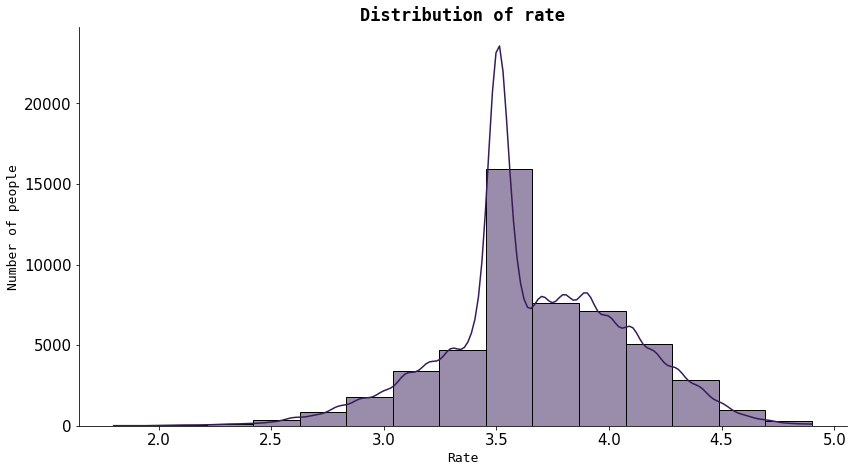

In [56]:
#Dist plot of the target variable - 'Purchase'
sns.displot(df['rate'], bins = 15,kde=True, legend=True,color='#371B58', height=6.27, aspect=11.7/6.27)
plt.title('Distribution of rate', fontdict = {'fontname' : 'Monospace', 'fontsize' : 17, 'fontweight' : 'bold'})
plt.xlabel('Rate', fontdict = {'fontname' : 'Monospace', 'fontsize' : 13})
plt.ylabel('Number of people', fontdict = {'fontname' : 'Monospace', 'fontsize' : 13})
plt.tick_params(labelsize = 15)
plt.show()

In [57]:
#BOXPLOT ANALYSIS

def boxplot(data):
    print()
    print()
    print("Boxplot analysis for column:\n ",data)
    Q1=data.quantile(0.25)
    median=data.quantile(0.50)
    Q3=data.quantile(0.75)
    
    #inter-quantile range
    IQR=Q3-Q1
    
    Lower_Whiskers=data.quantile(0.25)-(1.5*IQR)
    Upper_Whiskers=data.quantile(0.75)+(1,5*IQR)
    print()
    print()
    
    print("Q1 : \t ",Q1)
    print("Median : ",median)
    print("Q3 :\t ",Q3)
    print("IQR :    ",IQR)
    print("Lower Whiskers : ",Lower_Whiskers)
    print("Upper Whiskers : ",Upper_Whiskers)
    print("Minimum :\t ",min(data))
    print("Maximum :  \t", max(data))

In [58]:
boxplot(df['rate'])



Boxplot analysis for column:
  0        4.100000
1        4.100000
2        3.800000
3        3.700000
4        3.800000
           ...   
51712    3.600000
51713    3.508698
51714    3.508698
51715    4.300000
51716    3.400000
Name: rate, Length: 51148, dtype: float64


Q1 : 	  3.5
Median :  3.6
Q3 :	  3.9
IQR :     0.3999999999999999
Lower Whiskers :  2.9000000000000004
Upper Whiskers :  [4.9 5.9]
Minimum :	  1.8
Maximum :  	 4.9


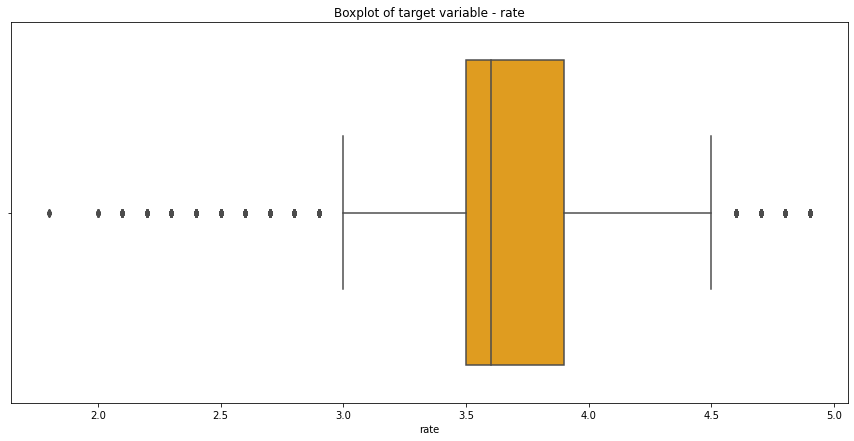

In [59]:
plt.subplots(figsize=(15,7))
sns.boxplot(df['rate'], color='orange')
plt.title('Boxplot of target variable - rate')
plt.show()

In [60]:
df['rate'].skew()

-0.08757908870560564

In [61]:
df['rate'].describe()

count    51148.000000
mean         3.664651
std          0.402492
min          1.800000
25%          3.500000
50%          3.600000
75%          3.900000
max          4.900000
Name: rate, dtype: float64

In [62]:
df['rate'].mode()

0    3.508698
dtype: float64

In [63]:
df['rate'].median()   
# mode = 3.5 median = 3.6 mean = 3.66 : positive skewness : leptokurtic

3.6

In [64]:
df['rate'].kurtosis()

0.38172358127141814

## Number of Restaurants that take Online order

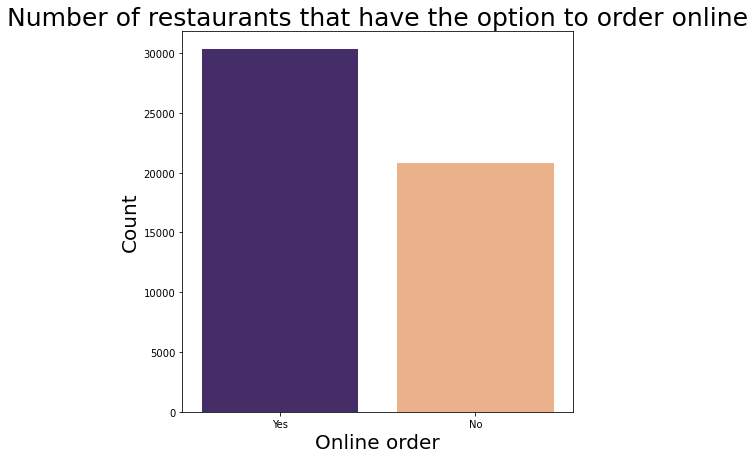

Yes    30311
No     20837
Name: online_order, dtype: int64

In [65]:
plt.figure(figsize=(7,7))

sns.countplot(df['online_order'], palette=['#432371',"#FAAE7B"])
plt.title("Number of restaurants that have the option to order online",fontsize=25)
plt.ylabel("Count",fontsize=20)
plt.xlabel("Online order",fontsize=20)
plt.show()

df['online_order'].value_counts()

## Number of Restaurants that have the option to book table

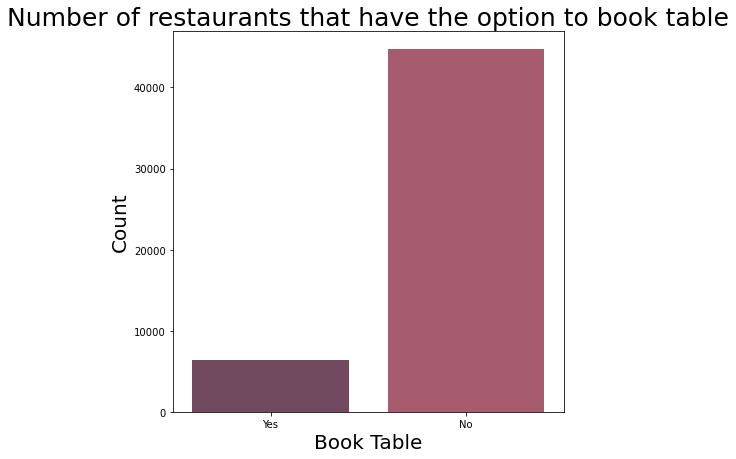

No     44699
Yes     6449
Name: book_table, dtype: int64

In [66]:
plt.figure(figsize=(7,7))

sns.countplot(df['book_table'], palette=["#774360","#B25068"])
plt.title("Number of restaurants that have the option to book table",fontsize=25)
plt.ylabel("Count",fontsize=20)
plt.xlabel("Book Table",fontsize=20)
plt.show()

df['book_table'].value_counts()

## Restaurants according to meal type

In [67]:
df['listed_in(type)'].unique()

array(['Buffet', 'Cafes', 'Delivery', 'Desserts', 'Dine-out',
       'Drinks & nightlife', 'Pubs and bars'], dtype=object)

In [68]:
df['listed_in(type)'].value_counts()

Delivery              25653
Dine-out              17583
Desserts               3559
Cafes                  1703
Drinks & nightlife     1091
Buffet                  871
Pubs and bars           688
Name: listed_in(type), dtype: int64

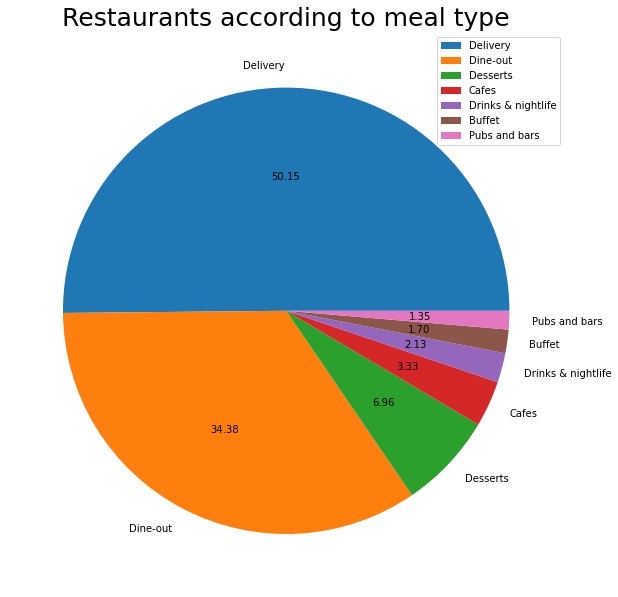

In [69]:
plt.figure(figsize=(10,12))
ax =df['listed_in(type)'].value_counts()
labels=df['listed_in(type)'].value_counts().index
plt.pie(ax,labels=labels,autopct='%.2f')
plt.title("Restaurants according to meal type",fontsize=25)
plt.legend()
plt.show()

In [70]:
df.nunique()

name               8723
online_order          2
book_table            2
rate                 33
votes              2326
location             93
rest_type            93
dish_liked         5241
cuisines           2704
average_cost         70
listed_in(type)       7
dtype: int64

## Types of Resturants in Bangalore

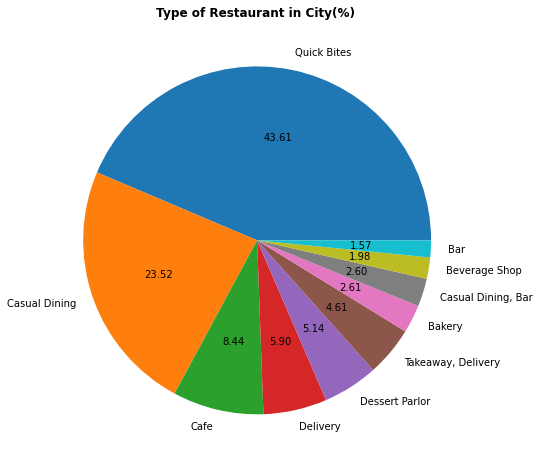

In [71]:
plt.figure(figsize=(8,8))
values = df.rest_type.value_counts()[:10]
labels = df['rest_type'].value_counts()[:10].index
plt.pie(values, labels=labels, autopct='%.2f')
plt.title('Type of Restaurant in City(%) ', weight='bold')
plt.show()

Text(0, 0.5, 'counts')

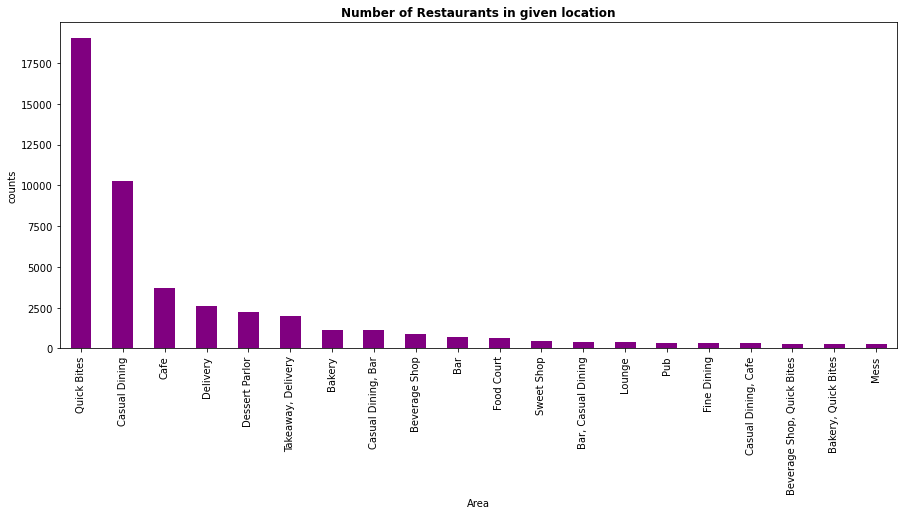

In [72]:
plt.figure(figsize=(15,6))
ax =df.rest_type.value_counts()[:20].plot(kind='bar',color="purple")
plt.title('Number of Restaurants in given location', weight='bold')
plt.xlabel('Area')
plt.ylabel('counts')

In [73]:
# making these entire insights in a summarized way

def mark(x):
    if x in ('Quick Bites', 'Casual Dining'):
        return 'Quick Bites + Casual Dinings'
    else:
        return 'others'
    
#this functions stores whether a restaurant is from quick_bites/casual dining or any other

In [74]:
df['Top_types']=df['rest_type'].apply(mark)   #creating a new column and storing the Mark

In [75]:
df.head()

name online_order book_table  rate  votes      location  \
0                  Jalsa          Yes        Yes   4.1    775  Banashankari   
1         Spice Elephant          Yes         No   4.1    787  Banashankari   
2        San Churro Cafe          Yes         No   3.8    918  Banashankari   
3  Addhuri Udupi Bhojana           No         No   3.7     88  Banashankari   
4          Grand Village           No         No   3.8    166  Basavanagudi   

             rest_type                                         dish_liked  \
0        Casual Dining  Pasta, Lunch Buffet, Masala Papad, Paneer Laja...   
1        Casual Dining  Momos, Lunch Buffet, Chocolate Nirvana, Thai G...   
2  Cafe, Casual Dining  Churros, Cannelloni, Minestrone Soup, Hot Choc...   
3          Quick Bites                                        Masala Dosa   
4        Casual Dining                                Panipuri, Gol Gappe   

                         cuisines  average_cost listed_in(type)  \
0  North Indian, Mughlai, Chinese         800.0          Buffet   
1     Chinese, North Indian, Thai         800.0          Buffet   
2          Cafe, Mexican, Italian         800.0          Buffet   
3      South Indian, North Indian         300.0          Buffet   
4        North Indian, Rajasthani         600.0          Buffet   

                      Top_types  
0  Quick Bites + Casual Dinings  
1  Quick Bites + Casual Dinings  
2                        others  
3  Quick Bites + Casual Dinings  
4  Quick Bites + Casual Dinings

In [76]:
#to convert some figures into array put '.values' at the end
values=df['Top_types'].value_counts().values
#making index for our chart
label=df['Top_types'].value_counts().index
px.pie(df, names=label, values=values)

In [77]:
# plt.figure(figsize=(15,6))
# ax =df.average_cost.value_counts()[:20]
# plt.title('Average cost in resturants', weight='bold')
# plt.xlabel('Area')
# plt.ylabel('counts')





# plt.figure(figsize=(8,8))
# values = df['average_cost'].value_counts()[:10]
# labels = df['average_cost'].value_counts()[:10].index
# plt.pie(values, labels=labels, autopct='%.2f')
# plt.title('Average cost for two person(in %) ', weight='bold')
# plt.show()

## Average costs in resturants

In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51148 entries, 0 to 51716
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             51148 non-null  object 
 1   online_order     51148 non-null  object 
 2   book_table       51148 non-null  object 
 3   rate             51148 non-null  float64
 4   votes            51148 non-null  int64  
 5   location         51148 non-null  object 
 6   rest_type        51148 non-null  object 
 7   dish_liked       23435 non-null  object 
 8   cuisines         51148 non-null  object 
 9   average_cost     51148 non-null  float64
 10  listed_in(type)  51148 non-null  object 
 11  Top_types        51148 non-null  object 
dtypes: float64(2), int64(1), object(9)
memory usage: 7.1+ MB


## Famous dishes at restaurants

In [79]:
df.dish_liked.nunique()

5241

In [80]:
#dish_liked has some null values
df.dish_liked.isna().sum()

27713

In [81]:
data1 = df.copy()

dishes_data = data1[data1.dish_liked.notnull()]
dishes_data.dish_liked = dishes_data.dish_liked.apply(lambda x:x.lower().strip())

In [82]:
dishes_data.isnull().sum()

name               0
online_order       0
book_table         0
rate               0
votes              0
location           0
rest_type          0
dish_liked         0
cuisines           0
average_cost       0
listed_in(type)    0
Top_types          0
dtype: int64

In [83]:
dishes_data.dish_liked[:10]

0     pasta, lunch buffet, masala papad, paneer laja...
1     momos, lunch buffet, chocolate nirvana, thai g...
2     churros, cannelloni, minestrone soup, hot choc...
3                                           masala dosa
4                                   panipuri, gol gappe
5     onion rings, pasta, kadhai paneer, salads, sal...
7     farmhouse pizza, chocolate banana, virgin moji...
8     pizza, mocktails, coffee, nachos, salad, pasta...
9     waffles, pasta, coleslaw sandwich, choco waffl...
10    waffles, pasta, crispy chicken, honey chilli c...
Name: dish_liked, dtype: object

In [84]:
# count each dish to see how many times each dish repeated
dish_count = []
for i in dishes_data.dish_liked: ## iterate in each rows in table
    for t in i.split(','):
        t = t.strip() # remove the white spaces to get accurate results
        dish_count.append(t)

In [85]:
dish_count[:30] #lets see favourite top 10 dishes

['pasta',
 'lunch buffet',
 'masala papad',
 'paneer lajawab',
 'tomato shorba',
 'dum biryani',
 'sweet corn soup',
 'momos',
 'lunch buffet',
 'chocolate nirvana',
 'thai green curry',
 'paneer tikka',
 'dum biryani',
 'chicken biryani',
 'churros',
 'cannelloni',
 'minestrone soup',
 'hot chocolate',
 'pink sauce pasta',
 'salsa',
 'veg supreme pizza',
 'masala dosa',
 'panipuri',
 'gol gappe',
 'onion rings',
 'pasta',
 'kadhai paneer',
 'salads',
 'salad',
 'roti']

Text(0, 0.5, 'Count')

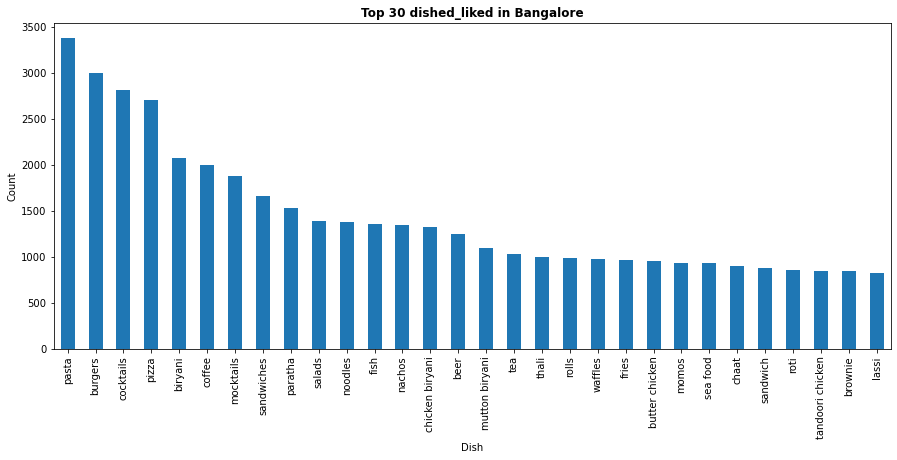

In [86]:
plt.figure(figsize=(15,6)) 
pd.Series(dish_count).value_counts()[:30].plot(kind='bar')
plt.title('Top 30 dished_liked in Bangalore',weight='bold')
plt.xlabel('Dish')
plt.ylabel('Count')

In [88]:
# dish_set = set(dish_count)
# dish_word_cloud = ', '.join(dish_set)

# plt.figure( figsize=(15,10) )
# wc = WordCloud(width=1600, height=1000,background_color="black", max_words=len(dish_word_cloud))
# wc.generate(dish_word_cloud)
# plt.imshow(wc, interpolation='bilinear')
# plt.title('Word Cloud for favourite dishes',weight='bold')
# plt.axis("off")
# plt.imshow(wc)
# plt.show()

## Top 10 cuisines in Bangalore

In [89]:
cuisines_data = df[df.cuisines.notnull()]
cuisines_data.cuisines = cuisines_data.cuisines.apply(lambda x:x.lower().strip())

In [90]:
cuisines_count= []

for i in cuisines_data.cuisines:
    for j in i.split(','):
        j = j.strip()
        cuisines_count.append(j)

Text(0, 0.5, 'No of restaurants')

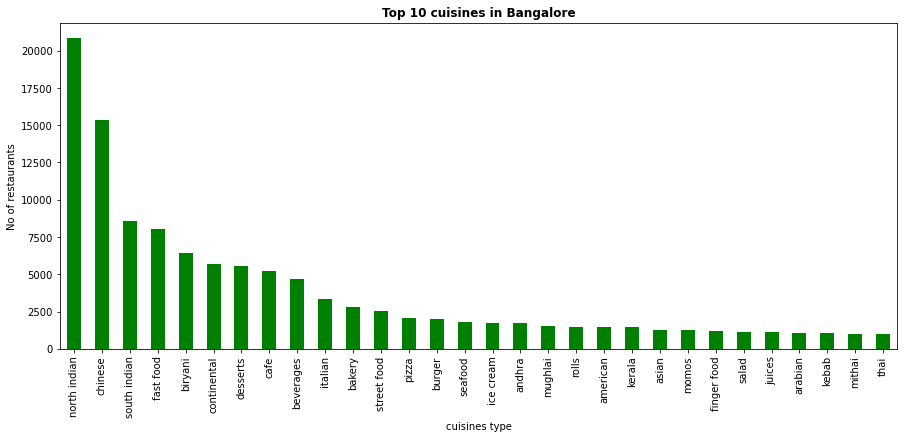

In [91]:
plt.figure(figsize=(15,6)) 
pd.Series(cuisines_count).value_counts()[:30].plot(kind='bar',color= 'g')
plt.title('Top 10 cuisines in Bangalore',weight='bold')
plt.xlabel('cuisines type')
plt.ylabel('No of restaurants')

## Name vs Number of Restaurants (Top 20)

In [92]:
df['name'].value_counts()

Cafe Coffee Day                                            96
Onesta                                                     85
Just Bake                                                  73
Empire Restaurant                                          71
Five Star Chicken                                          70
                                                           ..
Mast Biryani - Night Express                                1
Kings Court Daba                                            1
New Prakash Hotel                                           1
Taja Coffee                                                 1
Plunge - Sheraton Grand Bengaluru Whitefield Hotel &...     1
Name: name, Length: 8723, dtype: int64

Text(0.5, 1.0, 'Name Vs Number of Restaurants')

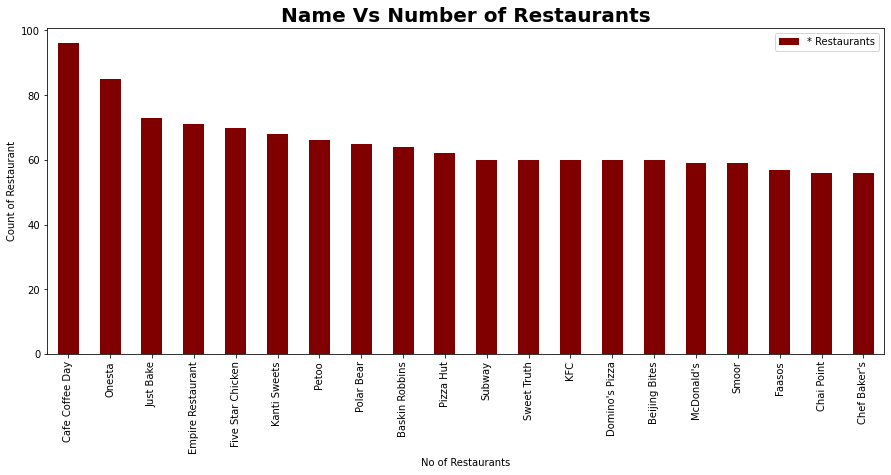

In [93]:
plt.figure(figsize=(15,6))
ax =df.name.value_counts()[:20].plot(kind='bar', color="maroon")
ax.legend(['* Restaurants'])
plt.xlabel('No of Restaurants')
plt.ylabel('Count of Restaurant')
plt.title("Name Vs Number of Restaurants", fontsize=20, weight='bold')

## Rate vs Restaurant type graph

In [94]:
# f,ax=plt.subplots(figsize=(18,8))
# g = sns.pointplot(x=df["rest_type"], y=df["rate"], data=df)
# g.set_xticklabels(g.get_xticklabels(), rotation=90)
# plt.title('Restaurent type vs Rate', weight = 'bold')
# plt.show()

## Rate vs Online Order

Text(0.5, 1.0, 'rate vs oline order')

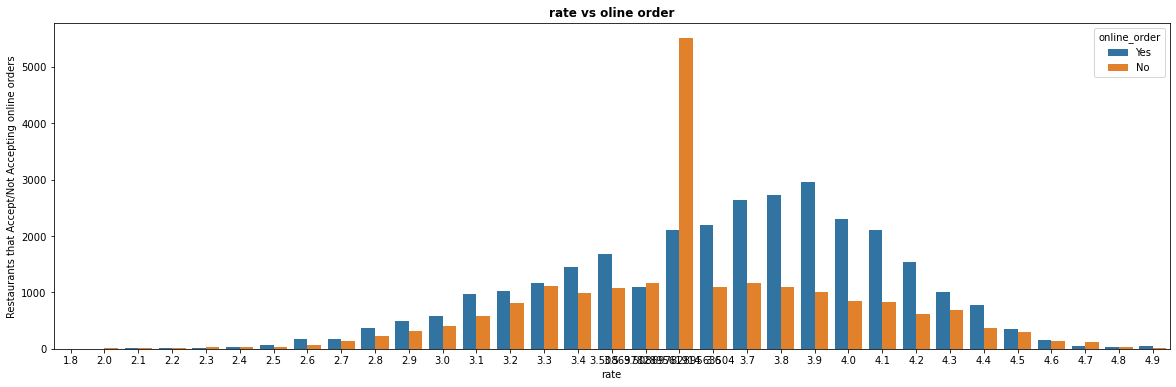

In [95]:
plt.figure(figsize = (20,6))
sns.countplot(x=df['rate'], hue = df['online_order'])
plt.ylabel("Restaurants that Accept/Not Accepting online orders")
plt.title("rate vs oline order",weight = 'bold')

In [96]:
df.shape

(51148, 12)

In [97]:
df['name'].nunique()

8723

In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51148 entries, 0 to 51716
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             51148 non-null  object 
 1   online_order     51148 non-null  object 
 2   book_table       51148 non-null  object 
 3   rate             51148 non-null  float64
 4   votes            51148 non-null  int64  
 5   location         51148 non-null  object 
 6   rest_type        51148 non-null  object 
 7   dish_liked       23435 non-null  object 
 8   cuisines         51148 non-null  object 
 9   average_cost     51148 non-null  float64
 10  listed_in(type)  51148 non-null  object 
 11  Top_types        51148 non-null  object 
dtypes: float64(2), int64(1), object(9)
memory usage: 7.1+ MB


## Creating a new dataframe  which contains votes, cost and rating of each restaurant

In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51148 entries, 0 to 51716
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             51148 non-null  object 
 1   online_order     51148 non-null  object 
 2   book_table       51148 non-null  object 
 3   rate             51148 non-null  float64
 4   votes            51148 non-null  int64  
 5   location         51148 non-null  object 
 6   rest_type        51148 non-null  object 
 7   dish_liked       23435 non-null  object 
 8   cuisines         51148 non-null  object 
 9   average_cost     51148 non-null  float64
 10  listed_in(type)  51148 non-null  object 
 11  Top_types        51148 non-null  object 
dtypes: float64(2), int64(1), object(9)
memory usage: 7.1+ MB


In [100]:
df['name1']=df['name']

In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51148 entries, 0 to 51716
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             51148 non-null  object 
 1   online_order     51148 non-null  object 
 2   book_table       51148 non-null  object 
 3   rate             51148 non-null  float64
 4   votes            51148 non-null  int64  
 5   location         51148 non-null  object 
 6   rest_type        51148 non-null  object 
 7   dish_liked       23435 non-null  object 
 8   cuisines         51148 non-null  object 
 9   average_cost     51148 non-null  float64
 10  listed_in(type)  51148 non-null  object 
 11  Top_types        51148 non-null  object 
 12  name1            51148 non-null  object 
dtypes: float64(2), int64(1), object(10)
memory usage: 7.5+ MB


In [102]:
df.groupby('name').agg({'votes':'sum', 'name1':'count', 'average_cost':'mean', 'rate':'mean'})

# you may think things within that {} wud be normal dictionary,
# but python again surprises us as it is a distionary but keys are columns and values are function applied on the key

votes  name1  average_cost  \
name                                                                       
#FeelTheROLL                                     14      2         200.0   
#L-81 Cafe                                      432      9         400.0   
#Vibes Restro                                     0      3         700.0   
#refuel                                         111      3         400.0   
'Brahmins' Thatte Idli                            0      1         100.0   
...                                             ...    ...           ...   
late100                                           0      5         200.0   
nu.tree                                        1443      8         400.0   
re:cess - Hilton Bangalore Embassy GolfLinks    438      3        1200.0   
repEAT Hub                                        0      2         200.0   
sCoolMeal                                         0      5         300.0   

                                                  rate  
name                                                    
#FeelTheROLL                                  3.400000  
#L-81 Cafe                                    3.900000  
#Vibes Restro                                 3.508698  
#refuel                                       3.700000  
'Brahmins' Thatte Idli                        3.508698  
...                                                ...  
late100                                       3.508698  
nu.tree                                       4.213587  
re:cess - Hilton Bangalore Embassy GolfLinks  4.100000  
repEAT Hub                                    3.508698  
sCoolMeal                                     3.508698  

[8723 rows x 4 columns]

In [103]:
rest=df.groupby('name').agg({'votes':'sum', 'name1':'count', 'average_cost':'mean', 'rate':'mean'}).reset_index()
#reset_index() is used to give numbering to rows and making it a  dataframe
rest

name  votes  name1  \
0                                     #FeelTheROLL     14      2   
1                                       #L-81 Cafe    432      9   
2                                    #Vibes Restro      0      3   
3                                          #refuel    111      3   
4                           'Brahmins' Thatte Idli      0      1   
...                                            ...    ...    ...   
8718                                       late100      0      5   
8719                                       nu.tree   1443      8   
8720  re:cess - Hilton Bangalore Embassy GolfLinks    438      3   
8721                                    repEAT Hub      0      2   
8722                                     sCoolMeal      0      5   

      average_cost      rate  
0            200.0  3.400000  
1            400.0  3.900000  
2            700.0  3.508698  
3            400.0  3.700000  
4            100.0  3.508698  
...            ...       ...  
8718         200.0  3.508698  
8719         400.0  4.213587  
8720        1200.0  4.100000  
8721         200.0  3.508698  
8722         300.0  3.508698  

[8723 rows x 5 columns]

In [104]:
rest.columns=['name','total_votes','total_units','avg_cost','mean_rating']   #changing the name of columns
rest.head()

name  total_votes  total_units  avg_cost  mean_rating
0            #FeelTheROLL           14            2     200.0     3.400000
1              #L-81 Cafe          432            9     400.0     3.900000
2           #Vibes Restro            0            3     700.0     3.508698
3                 #refuel          111            3     400.0     3.700000
4  'Brahmins' Thatte Idli            0            1     100.0     3.508698

In [105]:
rest['votes_per_units']=rest['total_votes']/rest['total_units']    #adding a new column
rest.head()

name  total_votes  total_units  avg_cost  mean_rating  \
0            #FeelTheROLL           14            2     200.0     3.400000   
1              #L-81 Cafe          432            9     400.0     3.900000   
2           #Vibes Restro            0            3     700.0     3.508698   
3                 #refuel          111            3     400.0     3.700000   
4  'Brahmins' Thatte Idli            0            1     100.0     3.508698   

   votes_per_units  
0              7.0  
1             48.0  
2              0.0  
3             37.0  
4              0.0

## Restaurant analysis by total units

In [106]:
popular=rest.sort_values(by='total_units', ascending=False)
popular.head(10)

name  total_votes  total_units    avg_cost  mean_rating  \
1313    Cafe Coffee Day         3089           96  844.791667     3.283198   
5509             Onesta       347520           85  600.000000     4.410588   
3762          Just Bake         2898           73  400.000000     3.414414   
2428  Empire Restaurant       229808           71  685.211268     4.015738   
2558  Five Star Chicken         3134           70  257.857143     3.427391   
3932       Kanti Sweets         7336           68  400.000000     3.898529   
5747              Petoo         4242           66  659.848485     3.803821   
5796         Polar Bear         8121           65  361.538462     3.974783   
821      Baskin Robbins         2487           64  251.562500     3.570584   
5773          Pizza Hut        20161           62  736.290323     3.380926   

      votes_per_units  
1313        32.177083  
5509      4088.470588  
3762        39.698630  
2428      3236.732394  
2558        44.771429  
3932       107.882353  
5747        64.272727  
5796       124.938462  
821         38.859375  
5773       325.177419

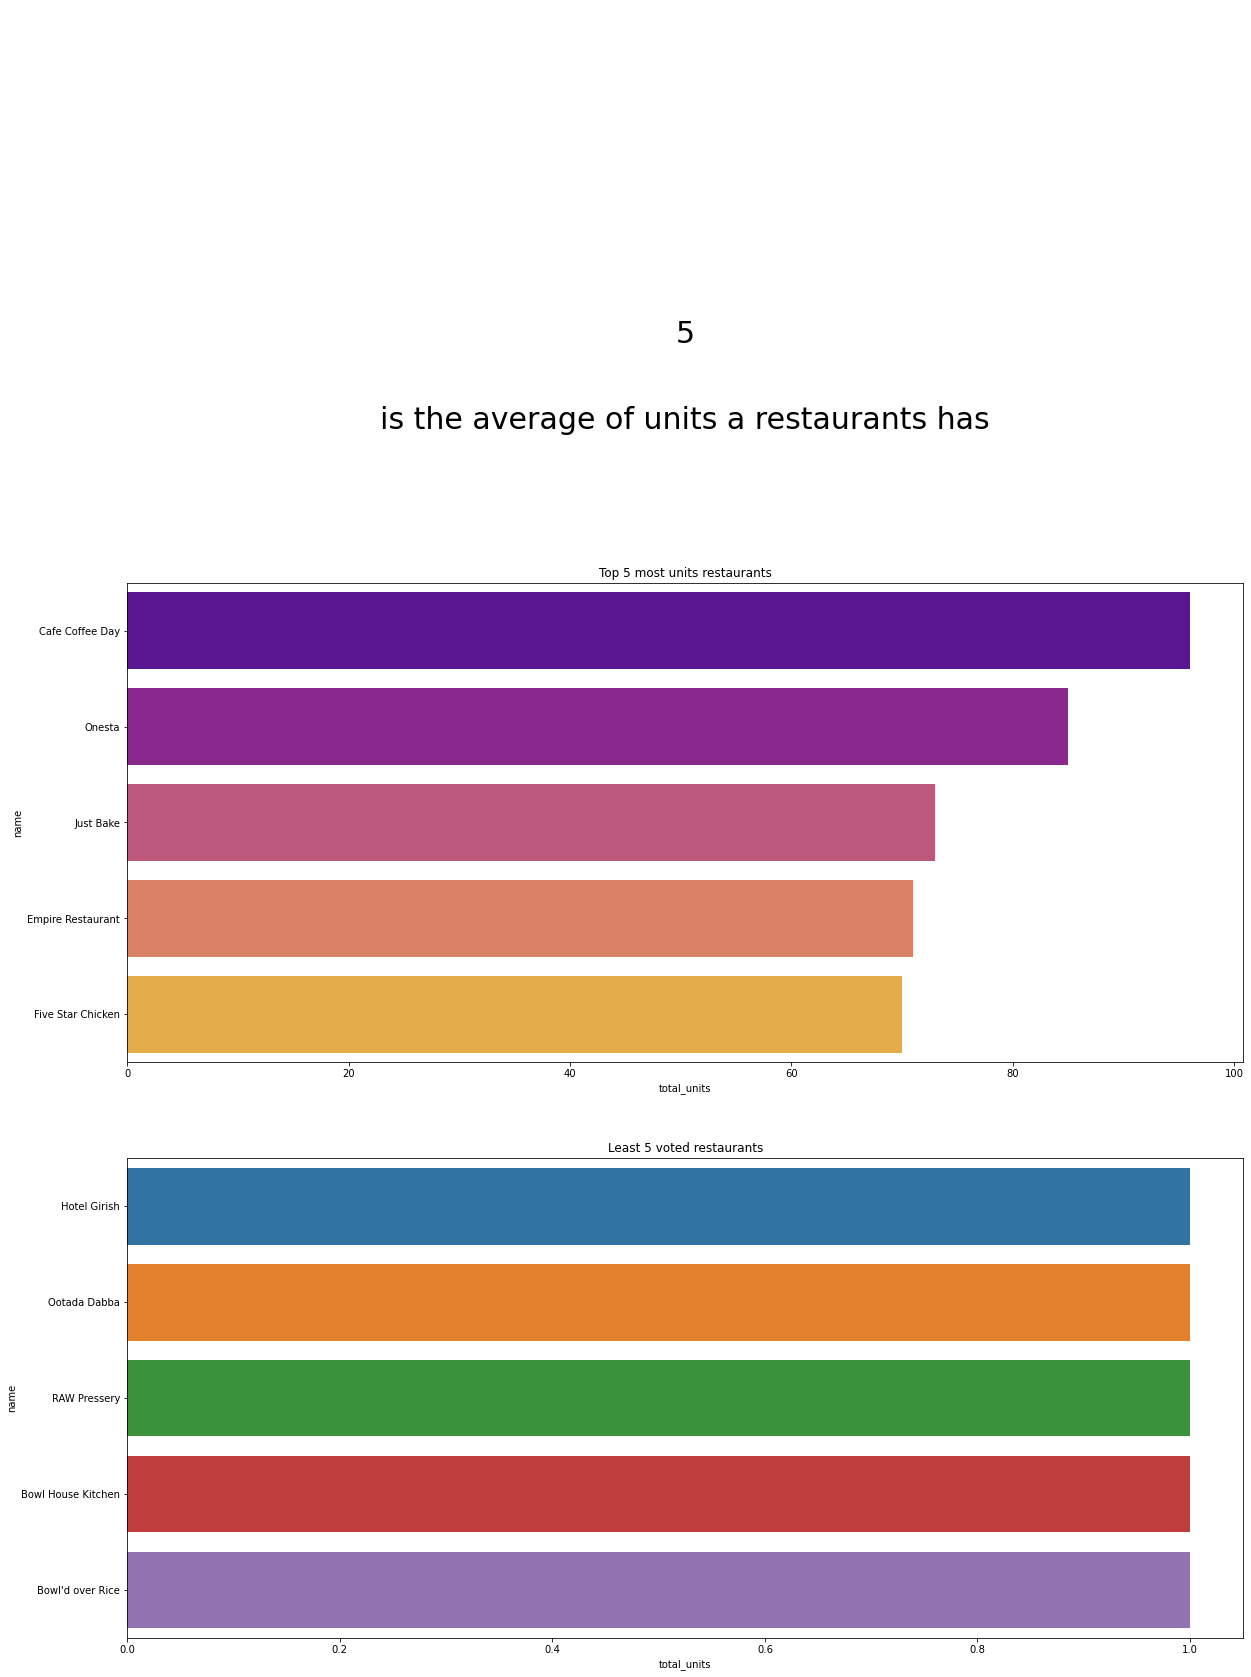

In [107]:
#creating a subplot
#using seaborn
fig, (ax1, ax2, ax3)=plt.subplots(3,1,figsize=(20,30))
ax1.text(0.50, 0.30, int(popular['total_units'].mean()), fontsize=30, ha='center')
ax1.text(0.50, 0.12, "is the average of units a restaurants has", fontsize=30, ha='center')
#ax1.text(0.50, 0.00, "recieved by restaurants", fontsize=30, ha='center')
ax1.axis('off')  # for turning off the axis

sns.barplot(x='total_units', y='name', data=popular.sort_values(by='total_units', ascending=False).query('total_units > 0').head(5), ax=ax2, palette='plasma')
ax2.set_title('Top 5 most units restaurants')    # setting title for a graph

sns.barplot(x='total_units', y='name', data=popular.sort_values(by='total_units', ascending=True).query('total_units > 0').head(5), ax=ax3)
ax3.set_title('Least 5 voted restaurants')

plt.show()

## Restaurant analysis by total votes

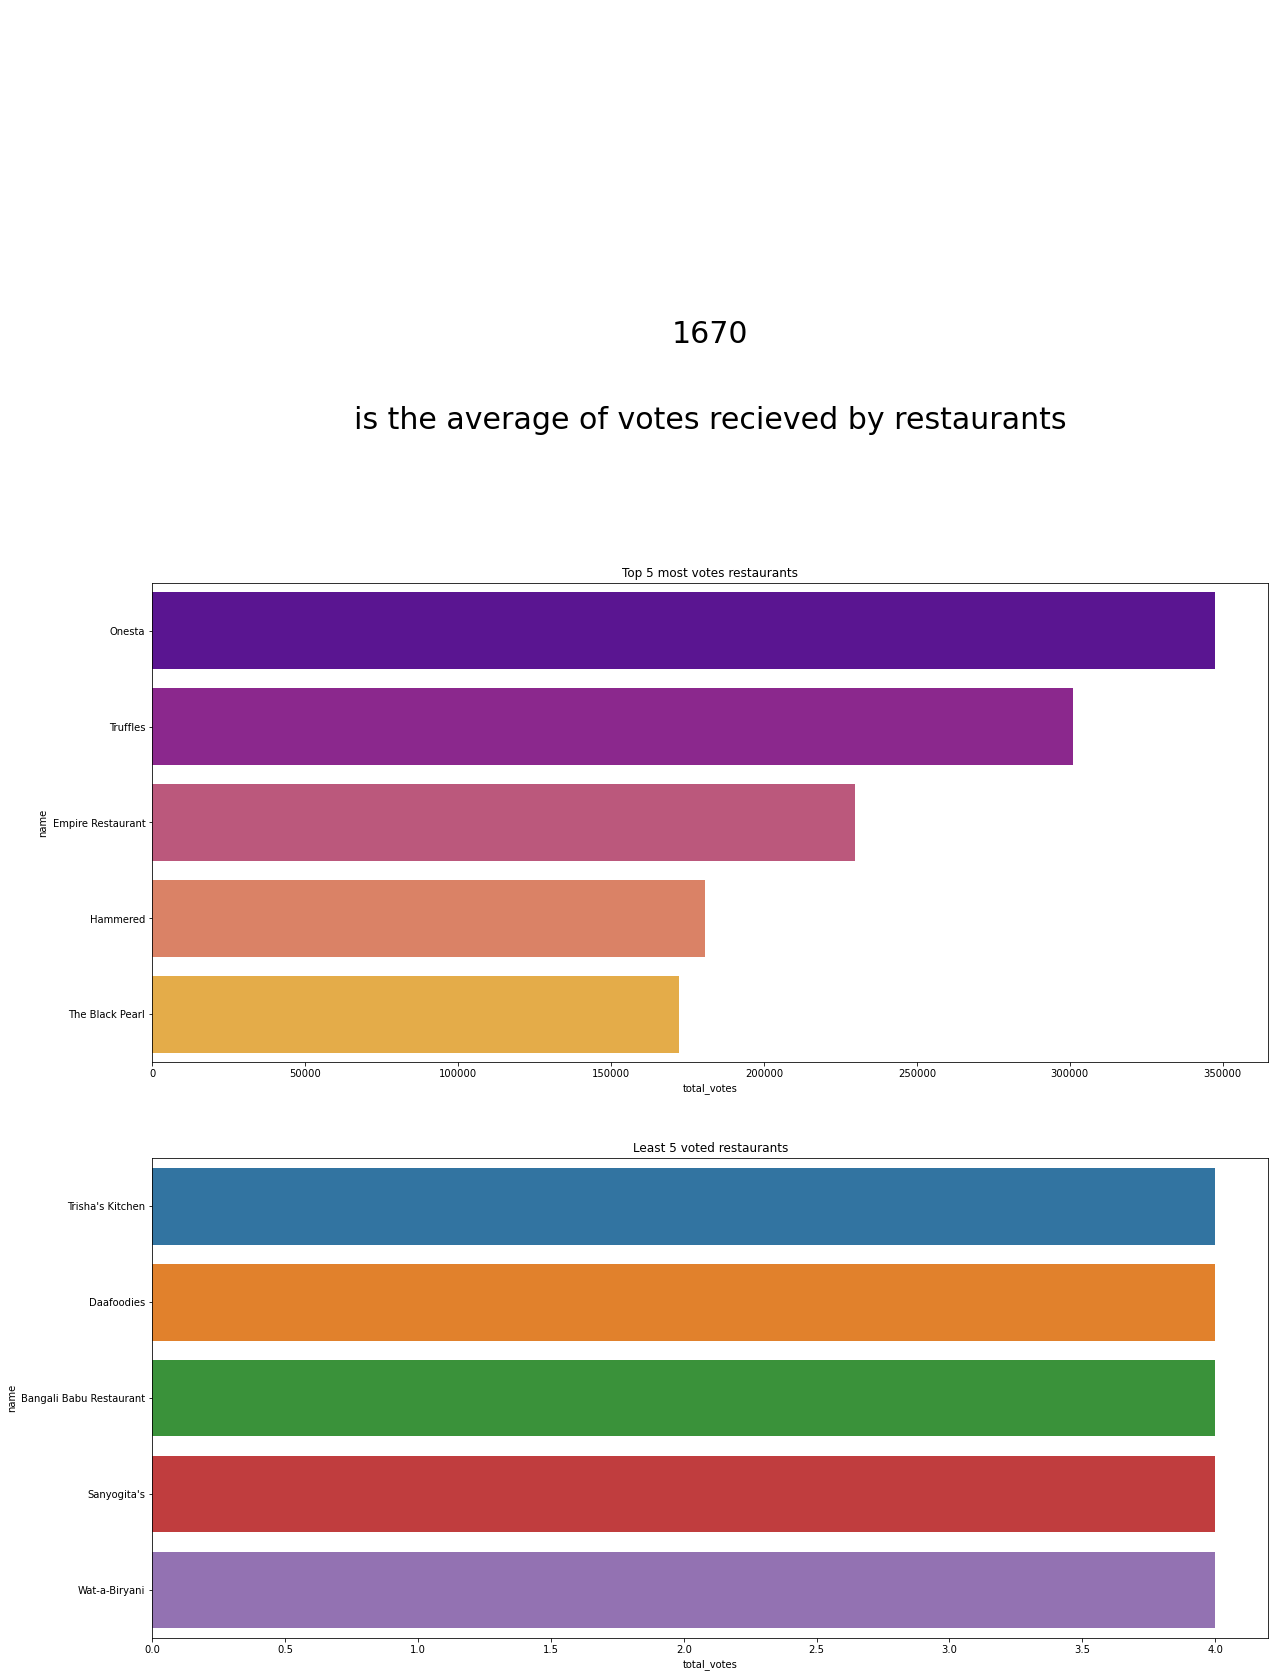

In [108]:
#creating a subplot
#using seaborn
fig, (ax1, ax2, ax3)=plt.subplots(3,1,figsize=(20,30))
ax1.text(0.50, 0.30, int(popular['total_votes'].mean()), fontsize=30, ha='center')
ax1.text(0.50, 0.12, "is the average of votes recieved by restaurants", fontsize=30, ha='center')
#ax1.text(0.50, 0.00, "recieved by restaurants", fontsize=30, ha='center')
ax1.axis('off')  # for turning off the axis

sns.barplot(x='total_votes', y='name', data=popular.sort_values(by='total_votes', ascending=False).query('total_votes > 0').head(5), ax=ax2, palette='plasma')
ax2.set_title('Top 5 most votes restaurants')    # setting title for a graph

sns.barplot(x='total_votes', y='name', data=popular.sort_values(by='total_votes', ascending=True).query('total_votes > 0').head(5), ax=ax3)
ax3.set_title('Least 5 voted restaurants')

plt.show()

## Restaurant analysis by price point (average cost)

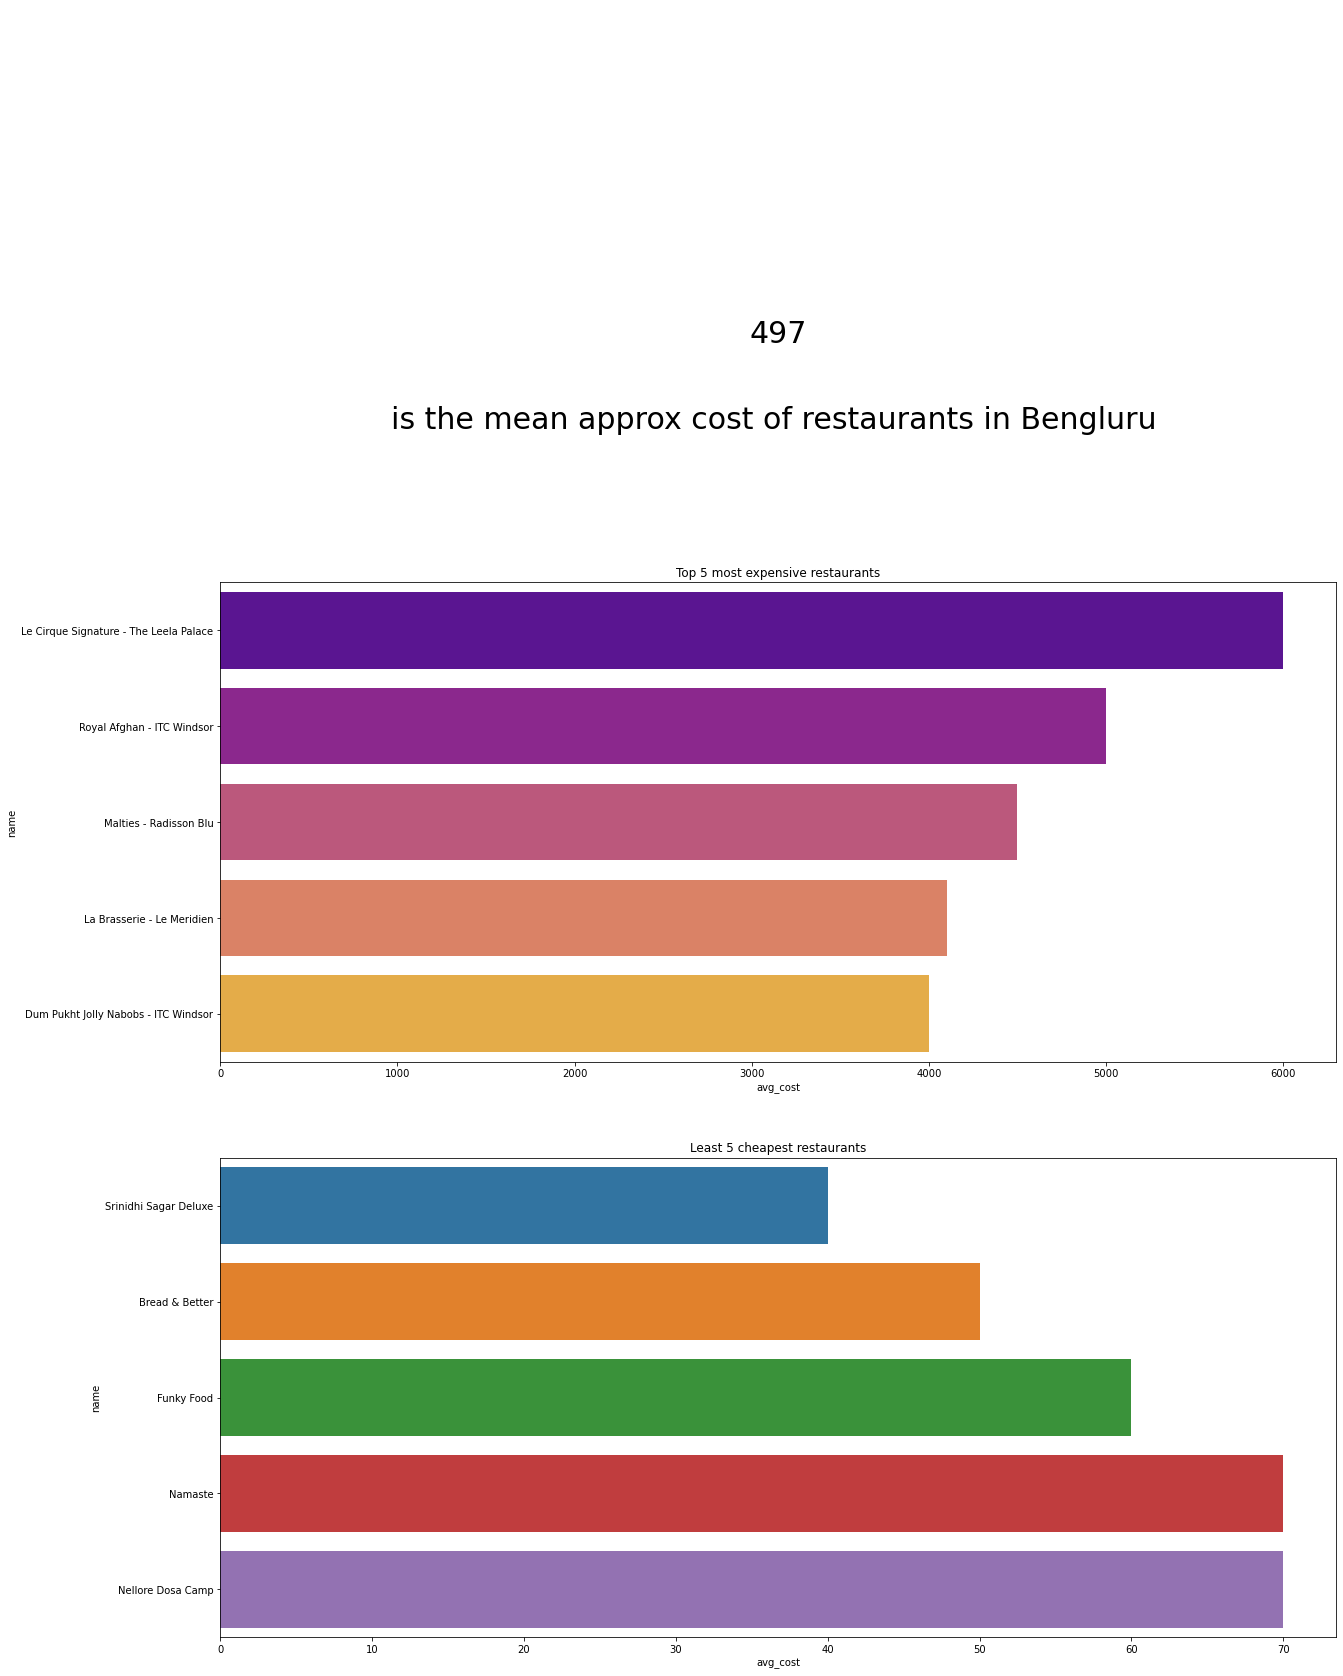

In [109]:
#creating a subplot
#using seaborn
fig, (bx1, bx2, bx3)=plt.subplots(3,1,figsize=(20,30))
bx1.text(0.50, 0.30, int(popular['avg_cost'].mean()), fontsize=30, ha='center')
bx1.text(0.50, 0.12, "is the mean approx cost of restaurants in Bengluru ", fontsize=30, ha='center')
bx1.axis('off')  # for turning off the axis

sns.barplot(x='avg_cost', y='name', data=popular.sort_values(by='avg_cost', ascending=False).query('avg_cost > 0').head(5), ax=bx2, palette='plasma')
bx2.set_title('Top 5 most expensive restaurants')    # setting title for a graph

sns.barplot(x='avg_cost', y='name', data=popular.sort_values(by='avg_cost', ascending=True).query('avg_cost > 0').head(5), ax=bx3)
bx3.set_title('Least 5 cheapest restaurants')

plt.show()

## Best budget resturant at any location

In [110]:
filter=(df['average_cost']<=400)& (df['rate']>=4)
budget=df[filter]
budget.head()

name online_order book_table  rate  votes  \
39  Maruthi Davangere Benne Dosa          Yes         No   4.0     17   
51              Shree Cool Point          Yes         No   4.1     28   
52        Corner House Ice Cream           No         No   4.3    345   
65                   Kabab Magic          Yes         No   4.1   1720   
71              The Biryani Cafe           No         No   4.1    520   

        location       rest_type  \
39  Banashankari     Quick Bites   
51   Vijay Nagar     Quick Bites   
52  Banashankari  Dessert Parlor   
65  Basavanagudi     Quick Bites   
71  Banashankari     Quick Bites   

                                           dish_liked  \
39                                                NaN   
51                                                NaN   
52  Hot Chocolate Fudge, Vanilla Ice Cream, Fudge ...   
65  Grape Juice, Chicken Grill, Chicken Tikka Roll...   
71  Vegetable Biryani, Ginger Chicken, Chicken Bir...   

                                   cuisines  average_cost listed_in(type)  \
39                             South Indian         150.0        Delivery   
51        Fast Food, Street Food, Beverages         150.0        Delivery   
52                      Ice Cream, Desserts         400.0        Delivery   
65  North Indian, Kebab, Chinese, Fast Food         400.0        Delivery   
71                  Biryani, Chinese, Kebab         300.0        Delivery   

                       Top_types                         name1  
39  Quick Bites + Casual Dinings  Maruthi Davangere Benne Dosa  
51  Quick Bites + Casual Dinings              Shree Cool Point  
52                        others        Corner House Ice Cream  
65  Quick Bites + Casual Dinings                   Kabab Magic  
71  Quick Bites + Casual Dinings              The Biryani Cafe

In [111]:
def return_budget(location, restaurant_type):
    filter=(df['average_cost']<=400) & (df['rate']>=4) & (df['location']==location) & (df['rest_type']==restaurant_type)
    budget=df[filter]
    return budget['name'].unique()

In [112]:
return_budget('BTM','Quick Bites')

array(['Hiyar Majhe Kolkata', 'Swadista Aahar', 'Swad Punjab Da',
       'Roti Wala', 'Litti Twist', 'The Shawarma Shop', 'Gorbandh',
       'Yum In My Tum', 'Nanna Munna Paratha House', 'Chaatimes',
       'Andhra Kitchen', "Muthashy's", 'Ashirvaad Grand', 'Petoo',
       'Ilyazsab The House Of Chicken', 'Kannur Food Point',
       "Domino's Pizza", 'KFC', 'Hari Super Sandwich',
       'The Biriyani Pedia', 'World Of Asia'], dtype=object)

## Top 20 locations in Bangalore

In [113]:
df['location'].unique()

array(['Banashankari', 'Basavanagudi', 'Mysore Road', 'Jayanagar',
       'Kumaraswamy Layout', 'Rajarajeshwari Nagar', 'Vijay Nagar',
       'Uttarahalli', 'JP Nagar', 'South Bangalore', 'City Market',
       'Nagarbhavi', 'Bannerghatta Road', 'BTM', 'Kanakapura Road',
       'Bommanahalli', 'CV Raman Nagar', 'Electronic City', 'HSR',
       'Marathahalli', 'Wilson Garden', 'Shanti Nagar',
       'Koramangala 5th Block', 'Koramangala 8th Block', 'Richmond Road',
       'Koramangala 7th Block', 'Jalahalli', 'Koramangala 4th Block',
       'Bellandur', 'Sarjapur Road', 'Whitefield', 'East Bangalore',
       'Old Airport Road', 'Indiranagar', 'Koramangala 1st Block',
       'Frazer Town', 'RT Nagar', 'MG Road', 'Brigade Road',
       'Lavelle Road', 'Church Street', 'Ulsoor', 'Residency Road',
       'Shivajinagar', 'Infantry Road', 'St. Marks Road',
       'Cunningham Road', 'Race Course Road', 'Commercial Street',
       'Vasanth Nagar', 'HBR Layout', 'Domlur', 'Ejipura',
       'Jeeva

Text(0, 0.5, 'counts')

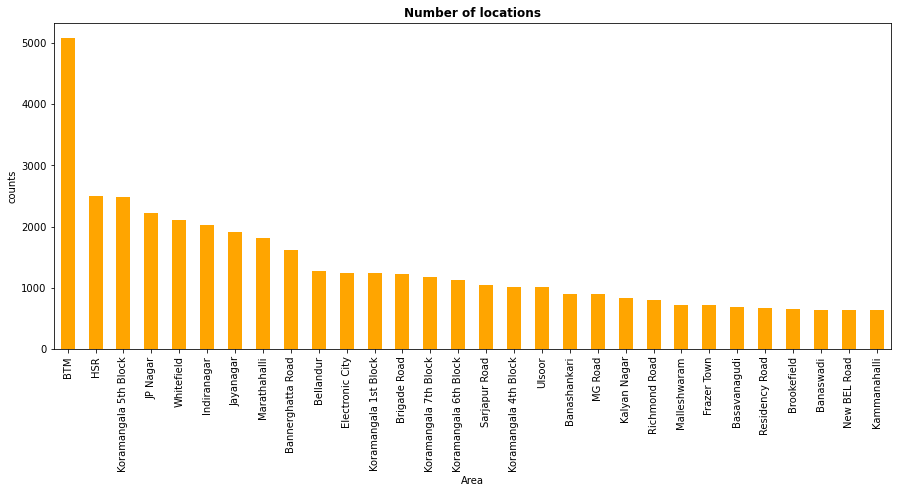

In [114]:
plt.figure(figsize=(15,6))
ax =df.location.value_counts()[:30].plot(kind='bar',color="orange")
plt.title('Number of locations', weight='bold')
plt.xlabel('Area')
plt.ylabel('counts')

## Restaurants based on geographical analysis in Bangalore

In [115]:
df.head()

name online_order book_table  rate  votes      location  \
0                  Jalsa          Yes        Yes   4.1    775  Banashankari   
1         Spice Elephant          Yes         No   4.1    787  Banashankari   
2        San Churro Cafe          Yes         No   3.8    918  Banashankari   
3  Addhuri Udupi Bhojana           No         No   3.7     88  Banashankari   
4          Grand Village           No         No   3.8    166  Basavanagudi   

             rest_type                                         dish_liked  \
0        Casual Dining  Pasta, Lunch Buffet, Masala Papad, Paneer Laja...   
1        Casual Dining  Momos, Lunch Buffet, Chocolate Nirvana, Thai G...   
2  Cafe, Casual Dining  Churros, Cannelloni, Minestrone Soup, Hot Choc...   
3          Quick Bites                                        Masala Dosa   
4        Casual Dining                                Panipuri, Gol Gappe   

                         cuisines  average_cost listed_in(type)  \
0  North Indian, Mughlai, Chinese         800.0          Buffet   
1     Chinese, North Indian, Thai         800.0          Buffet   
2          Cafe, Mexican, Italian         800.0          Buffet   
3      South Indian, North Indian         300.0          Buffet   
4        North Indian, Rajasthani         600.0          Buffet   

                      Top_types                  name1  
0  Quick Bites + Casual Dinings                  Jalsa  
1  Quick Bites + Casual Dinings         Spice Elephant  
2                        others        San Churro Cafe  
3  Quick Bites + Casual Dinings  Addhuri Udupi Bhojana  
4  Quick Bites + Casual Dinings          Grand Village

In [116]:
geolocator=Nominatim(user_agent="app")

In [117]:
data=df['name'][0]
data   # this data in string format

'Jalsa'

In [118]:
# for getting the location we have to convert it to geographical format using geocode
#df['name'][0]=geolocator.geocode(data) showing stupid ununderstandable error
data=geolocator.geocode(data)

In [119]:
data.latitude

32.1524346

In [120]:
data.longitude

77.1443224

In [121]:
df['location'].unique()    # NUNIQUE gives number of unique values while UNIQUE gives actual uniques data

array(['Banashankari', 'Basavanagudi', 'Mysore Road', 'Jayanagar',
       'Kumaraswamy Layout', 'Rajarajeshwari Nagar', 'Vijay Nagar',
       'Uttarahalli', 'JP Nagar', 'South Bangalore', 'City Market',
       'Nagarbhavi', 'Bannerghatta Road', 'BTM', 'Kanakapura Road',
       'Bommanahalli', 'CV Raman Nagar', 'Electronic City', 'HSR',
       'Marathahalli', 'Wilson Garden', 'Shanti Nagar',
       'Koramangala 5th Block', 'Koramangala 8th Block', 'Richmond Road',
       'Koramangala 7th Block', 'Jalahalli', 'Koramangala 4th Block',
       'Bellandur', 'Sarjapur Road', 'Whitefield', 'East Bangalore',
       'Old Airport Road', 'Indiranagar', 'Koramangala 1st Block',
       'Frazer Town', 'RT Nagar', 'MG Road', 'Brigade Road',
       'Lavelle Road', 'Church Street', 'Ulsoor', 'Residency Road',
       'Shivajinagar', 'Infantry Road', 'St. Marks Road',
       'Cunningham Road', 'Race Course Road', 'Commercial Street',
       'Vasanth Nagar', 'HBR Layout', 'Domlur', 'Ejipura',
       'Jeeva

In [122]:
locations=pd.DataFrame({'Name':df['location'].unique()})
locations

Name
0         Banashankari
1         Basavanagudi
2          Mysore Road
3            Jayanagar
4   Kumaraswamy Layout
..                 ...
88      West Bangalore
89         Magadi Road
90           Yelahanka
91      Sahakara Nagar
92              Peenya

[93 rows x 1 columns]

In [123]:
lat=[]; lon=[]

for loc in locations['Name']:
    loc=geolocator.geocode(loc)
    if loc is None:
        lat.append(np.nan)
        lon.append(np.nan)
        
    else:
        lat.append(loc.latitude)
        lon.append(loc.longitude)

In [124]:
locations['latitude']=lat
locations['longitude']=lon

In [125]:
locations.head()

Name   latitude  longitude
0        Banashankari  15.887678  75.704678
1        Basavanagudi  12.941726  77.575502
2         Mysore Road  12.946662  77.530090
3           Jayanagar  27.643927  83.052805
4  Kumaraswamy Layout  12.908149  77.555318

## Perform geographical analysis(GeoSpatial analysis) where most of my restaurants are situated

In [126]:
df['location'].value_counts()

BTM                      5071
HSR                      2496
Koramangala 5th Block    2481
JP Nagar                 2219
Whitefield               2109
                         ... 
West Bangalore              6
Yelahanka                   5
Jakkur                      3
Rajarajeshwari Nagar        2
Peenya                      1
Name: location, Length: 93, dtype: int64

In [127]:
Rest_locations=df['location'].value_counts().reset_index()       #reset_index() is used to provide dataframe/series indexing 

In [128]:
Rest_locations.columns=['Name','Count']     #changing the name of columns
Rest_locations

Name  Count
0                     BTM   5071
1                     HSR   2496
2   Koramangala 5th Block   2481
3                JP Nagar   2219
4              Whitefield   2109
..                    ...    ...
88         West Bangalore      6
89              Yelahanka      5
90                 Jakkur      3
91   Rajarajeshwari Nagar      2
92                 Peenya      1

[93 rows x 2 columns]

In [129]:
Restaurant_locations=Rest_locations.merge(locations, on='Name').dropna()       # 'merge' used for merging two dataframes

#'ON' means wht column to merge
#dropna() drops all the missing values

In [130]:
Restaurant_locations

Name  Count   latitude   longitude
0                     BTM   5071  45.954851 -112.496595
1                     HSR   2496  18.147500   41.538889
2   Koramangala 5th Block   2481  12.934843   77.618977
3                JP Nagar   2219  12.265594   76.646540
4              Whitefield   2109  53.553368   -2.296902
..                    ...    ...        ...         ...
88         West Bangalore      6  12.984852   77.540063
89              Yelahanka      5  13.100698   77.596345
90                 Jakkur      3  13.078474   77.606894
91   Rajarajeshwari Nagar      2  12.927441   77.515522
92                 Peenya      1  13.032942   77.527325

[92 rows x 4 columns]

## Where exactly most of the restaurants are located

In [131]:
# for getting the location on the map
basemap=folium.Map(location=[12.97, 77.59])     # 12.97 and 77.59 is the latitude and longitude of Bangalore
basemap

In [132]:
HeatMap(data=Restaurant_locations[['latitude','longitude','Count']]).add_to(basemap)

# .add_to() function is used to adding new things to old😆

In [133]:
basemap

## Feature Engineering and Selection

In [134]:
df.shape

(51148, 13)

In [135]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51148 entries, 0 to 51716
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             51148 non-null  object 
 1   online_order     51148 non-null  object 
 2   book_table       51148 non-null  object 
 3   rate             51148 non-null  float64
 4   votes            51148 non-null  int64  
 5   location         51148 non-null  object 
 6   rest_type        51148 non-null  object 
 7   dish_liked       23435 non-null  object 
 8   cuisines         51148 non-null  object 
 9   average_cost     51148 non-null  float64
 10  listed_in(type)  51148 non-null  object 
 11  Top_types        51148 non-null  object 
 12  name1            51148 non-null  object 
dtypes: float64(2), int64(1), object(10)
memory usage: 7.5+ MB


### Dropping unneccessary columns

In [136]:
# drop unnecessary columns
column_to_drop = ['name1','Top_types']
df.drop(columns=column_to_drop, axis=1,inplace=True)

In [137]:
df.shape

(51148, 11)

In [138]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51148 entries, 0 to 51716
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             51148 non-null  object 
 1   online_order     51148 non-null  object 
 2   book_table       51148 non-null  object 
 3   rate             51148 non-null  float64
 4   votes            51148 non-null  int64  
 5   location         51148 non-null  object 
 6   rest_type        51148 non-null  object 
 7   dish_liked       23435 non-null  object 
 8   cuisines         51148 non-null  object 
 9   average_cost     51148 non-null  float64
 10  listed_in(type)  51148 non-null  object 
dtypes: float64(2), int64(1), object(8)
memory usage: 6.7+ MB


In [139]:
df['rate'].unique()

array([4.1       , 3.8       , 3.7       , 3.6       , 4.6       ,
       4.        , 4.2       , 3.9       , 3.1       , 3.        ,
       3.2       , 3.3       , 2.8       , 4.4       , 4.3       ,
       3.50869783, 2.9       , 3.5       , 3.50869783, 2.6       ,
       3.4       , 4.5       , 2.5       , 2.7       , 4.7       ,
       2.4       , 2.2       , 2.3       , 4.8       , 4.9       ,
       2.1       , 2.        , 1.8       ])

In [140]:
def assign(x):
    if x>0:
        return 1
    else:
        return 0

In [141]:
df['rated']=df['rate'].apply(assign)   #creating a new column rated

In [142]:
df['rated'].unique()

array([1], dtype=int64)

In [143]:
df['rate'].unique()

array([4.1       , 3.8       , 3.7       , 3.6       , 4.6       ,
       4.        , 4.2       , 3.9       , 3.1       , 3.        ,
       3.2       , 3.3       , 2.8       , 4.4       , 4.3       ,
       3.50869783, 2.9       , 3.5       , 3.50869783, 2.6       ,
       3.4       , 4.5       , 2.5       , 2.7       , 4.7       ,
       2.4       , 2.2       , 2.3       , 4.8       , 4.9       ,
       2.1       , 2.        , 1.8       ])

In [144]:
df['rate'].value_counts()

3.508698    7615
3.900000    3958
3.800000    3819
3.700000    3808
3.600000    3287
4.000000    3145
4.100000    2928
3.500000    2764
3.400000    2447
3.300000    2277
3.508698    2270
4.200000    2155
3.200000    1845
4.300000    1683
3.100000    1550
4.400000    1146
3.000000     991
2.900000     801
4.500000     656
2.800000     580
2.700000     303
4.600000     300
2.600000     249
4.700000     167
2.500000     100
2.400000      66
4.800000      66
4.900000      55
2.300000      51
2.200000      26
2.100000      24
2.000000      11
1.800000       5
Name: rate, dtype: int64

In [145]:
df.columns

Index(['name', 'online_order', 'book_table', 'rate', 'votes', 'location',
       'rest_type', 'dish_liked', 'cuisines', 'average_cost',
       'listed_in(type)', 'rated'],
      dtype='object')

## Splitting the dataset

In [146]:
df.shape

(51148, 12)

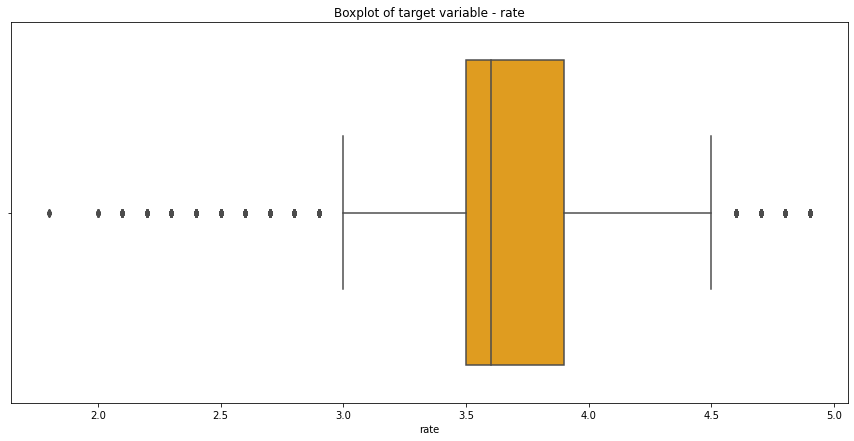

In [147]:
plt.subplots(figsize=(15,7))
sns.boxplot(df['rate'], color='orange')
plt.title('Boxplot of target variable - rate')
plt.show()

In [148]:
#Outlier detection and removal with IQR

# ''' Detection '''
# # IQR
# Q1 = np.percentile(df['rate'], 25,
#                    interpolation = 'midpoint')
 
# Q3 = np.percentile(df['rate'], 75,
#                    interpolation = 'midpoint')
# IQR = Q3 - Q1
 
print("Old Shape: ", df.shape)
 
# # Upper bound
# upper = np.where(df['rate'] >= (Q3+1.5*IQR))
# # Lower bound
# lower = np.where(df['rate'] <= (Q1-1.5*IQR))
 
# ''' Removing the Outliers '''
# print("upper[0]:", upper[0])
# print("lower[0]:", lower[0])
# df.drop(upper[0], inplace = True, axis=0)
# df.drop(lower[0], inplace = True, axis=0)
 
# print("New Shape: ", df.shape)

Q1 = df.rate.quantile(0.25)
Q3 = df.rate.quantile(0.75)
IQR = Q3-Q1
df= df[~((df.rate<(Q1-1.5*IQR)) | (df.rate>(Q3+1.5*IQR)))]

print("New Shape: ", df.shape)

Old Shape:  (51148, 12)
New Shape:  (48344, 12)


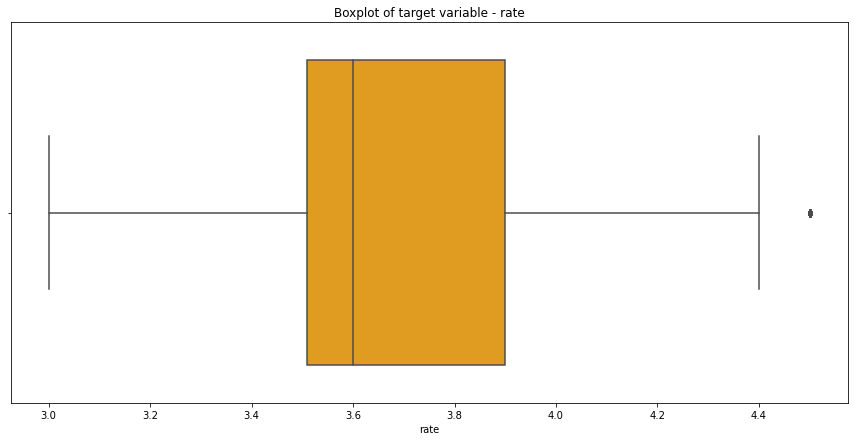

In [149]:
plt.subplots(figsize=(15,7))
sns.boxplot(df['rate'], color='orange')
plt.title('Boxplot of target variable - rate')
plt.show()

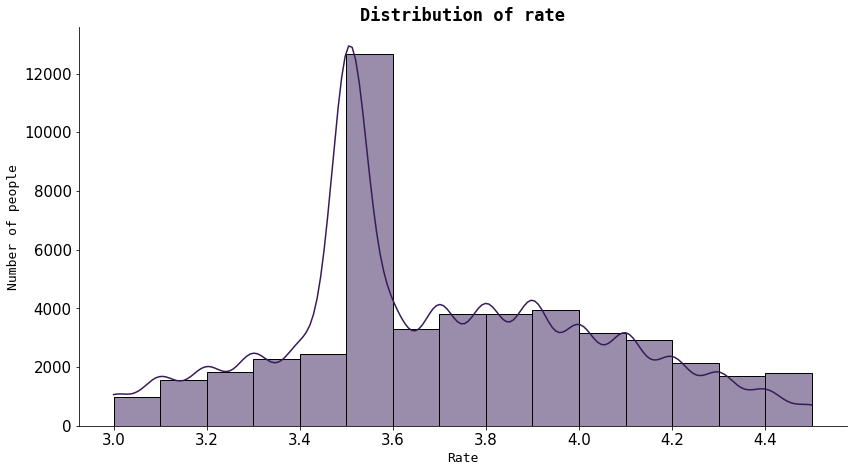

In [150]:
#Dist plot of the target variable - 'Purchase'
sns.displot(df['rate'], bins = 15,kde=True, legend=True,color='#371B58', height=6.27, aspect=11.7/6.27)
plt.title('Distribution of rate', fontdict = {'fontname' : 'Monospace', 'fontsize' : 17, 'fontweight' : 'bold'})
plt.xlabel('Rate', fontdict = {'fontname' : 'Monospace', 'fontsize' : 13})
plt.ylabel('Number of people', fontdict = {'fontname' : 'Monospace', 'fontsize' : 13})
plt.tick_params(labelsize = 15)
plt.show()

In [151]:
df['rate'].mean()

3.6945986686916212

In [152]:
df['rate'].median()

3.6

In [153]:
df['rate'].mode()

0    3.508698
dtype: float64

In [154]:
df['rate'].skew()

0.28332837055408044

In [155]:
df['rate'].kurtosis()

-0.4938363635443652

In [156]:
df['rate']

0        4.100000
1        4.100000
2        3.800000
3        3.700000
4        3.800000
           ...   
51712    3.600000
51713    3.508698
51714    3.508698
51715    4.300000
51716    3.400000
Name: rate, Length: 48344, dtype: float64

In [157]:
#saving the actual log values in real rating
df['real rating']=df['rate'].copy

In [158]:
#using log transformation on the rate values to make it a uniform distribution
df['rate'] = np.log(df['rate'])

In [159]:
df['rate']

0        1.410987
1        1.410987
2        1.335001
3        1.308333
4        1.335001
           ...   
51712    1.280934
51713    1.255245
51714    1.255245
51715    1.458615
51716    1.223775
Name: rate, Length: 48344, dtype: float64

In [160]:
#df['rate_exp']=np.exp(df['rate_log'])

In [161]:
#df['rate_exp']

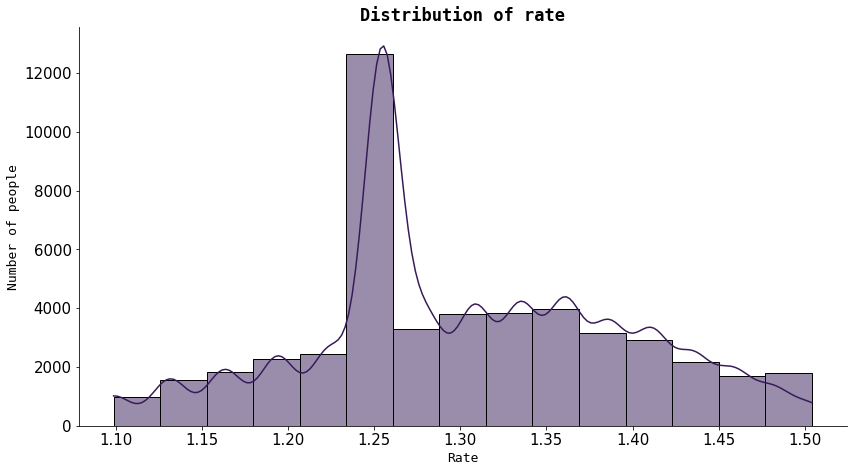

In [162]:
#Dist plot of the target variable - 'Purchase'
sns.displot(df['rate'], bins = 15,kde=True, legend=True,color='#371B58', height=6.27, aspect=11.7/6.27)
plt.title('Distribution of rate', fontdict = {'fontname' : 'Monospace', 'fontsize' : 17, 'fontweight' : 'bold'})
plt.xlabel('Rate', fontdict = {'fontname' : 'Monospace', 'fontsize' : 13})
plt.ylabel('Number of people', fontdict = {'fontname' : 'Monospace', 'fontsize' : 13})
plt.tick_params(labelsize = 15)
plt.show()

In [163]:
df['rate'].skew()

0.08122376220506976

In [164]:
new_restaurants=df[df['rated']==0].copy()   #shreya
#null_data=df[df['rated']==0].copy()
back=new_restaurants.copy()
train_val_restaurants=df.query('rated==1')   #df[df['rated']==1]    

In [165]:
train_val_restaurants.shape

(48344, 13)

In [166]:
new_restaurants.shape

(0, 13)

In [167]:
train_val_restaurants.head()

name online_order book_table      rate  votes  \
0                  Jalsa          Yes        Yes  1.410987    775   
1         Spice Elephant          Yes         No  1.410987    787   
2        San Churro Cafe          Yes         No  1.335001    918   
3  Addhuri Udupi Bhojana           No         No  1.308333     88   
4          Grand Village           No         No  1.335001    166   

       location            rest_type  \
0  Banashankari        Casual Dining   
1  Banashankari        Casual Dining   
2  Banashankari  Cafe, Casual Dining   
3  Banashankari          Quick Bites   
4  Basavanagudi        Casual Dining   

                                          dish_liked  \
0  Pasta, Lunch Buffet, Masala Papad, Paneer Laja...   
1  Momos, Lunch Buffet, Chocolate Nirvana, Thai G...   
2  Churros, Cannelloni, Minestrone Soup, Hot Choc...   
3                                        Masala Dosa   
4                                Panipuri, Gol Gappe   

                         cuisines  average_cost listed_in(type)  rated  \
0  North Indian, Mughlai, Chinese         800.0          Buffet      1   
1     Chinese, North Indian, Thai         800.0          Buffet      1   
2          Cafe, Mexican, Italian         800.0          Buffet      1   
3      South Indian, North Indian         300.0          Buffet      1   
4        North Indian, Rajasthani         600.0          Buffet      1   

                                         real rating  
0  <bound method NDFrame.copy of 0        1.41098...  
1  <bound method NDFrame.copy of 0        1.41098...  
2  <bound method NDFrame.copy of 0        1.41098...  
3  <bound method NDFrame.copy of 0        1.41098...  
4  <bound method NDFrame.copy of 0        1.41098...

In [168]:
train_val_restaurants['rate'].unique()

array([1.41098697, 1.33500107, 1.30833282, 1.28093385, 1.38629436,
       1.43508453, 1.36097655, 1.13140211, 1.09861229, 1.16315081,
       1.19392247, 1.48160454, 1.45861502, 1.25524498, 1.25276297,
       1.25524498, 1.22377543, 1.5040774 ])

### Create a Target variable for storing if restaurant is success or not

In [169]:
def GoodBad(x):
    if x>=3.75:
        return 1
    else:
        return 0

In [170]:
threshold=3.75
train_val_restaurants['target']=train_val_restaurants['rate'].apply(lambda x:1 if x>=threshold else 0)

# some warnings came while executing this hence warning module is used to ignore them

In [171]:
x=train_val_restaurants['target'].value_counts()
x
# checking if there is any imbalance in our data i.e., like if nmbr of 1s are much greater than nmbr of 0s

0    48344
Name: target, dtype: int64

In [172]:
labels=x.index
labels

Int64Index([0], dtype='int64')

([<matplotlib.patches.Wedge at 0x1f5aff4c820>],
 [Text(-1.1, 1.3471114790620887e-16, '0')])

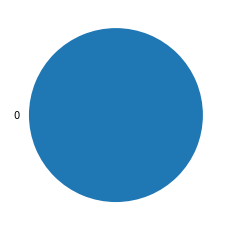

In [173]:
plt.pie(x, labels=labels)

### Performing feature importance on data

In [174]:
train_val_restaurants.columns

Index(['name', 'online_order', 'book_table', 'rate', 'votes', 'location',
       'rest_type', 'dish_liked', 'cuisines', 'average_cost',
       'listed_in(type)', 'rated', 'real rating', 'target'],
      dtype='object')

In [175]:
# creating a count fucntion to count number of values in some feature
def count(x):
    return len(x.split(','))

In [176]:
train_val_restaurants['total_cuisines']=train_val_restaurants['cuisines'].astype(str).apply(count)

In [177]:
train_val_restaurants['mutliple_types']=train_val_restaurants['rest_type'].astype(str).apply(count)

In [178]:
train_val_restaurants.head(5)

name online_order book_table      rate  votes  \
0                  Jalsa          Yes        Yes  1.410987    775   
1         Spice Elephant          Yes         No  1.410987    787   
2        San Churro Cafe          Yes         No  1.335001    918   
3  Addhuri Udupi Bhojana           No         No  1.308333     88   
4          Grand Village           No         No  1.335001    166   

       location            rest_type  \
0  Banashankari        Casual Dining   
1  Banashankari        Casual Dining   
2  Banashankari  Cafe, Casual Dining   
3  Banashankari          Quick Bites   
4  Basavanagudi        Casual Dining   

                                          dish_liked  \
0  Pasta, Lunch Buffet, Masala Papad, Paneer Laja...   
1  Momos, Lunch Buffet, Chocolate Nirvana, Thai G...   
2  Churros, Cannelloni, Minestrone Soup, Hot Choc...   
3                                        Masala Dosa   
4                                Panipuri, Gol Gappe   

                         cuisines  average_cost listed_in(type)  rated  \
0  North Indian, Mughlai, Chinese         800.0          Buffet      1   
1     Chinese, North Indian, Thai         800.0          Buffet      1   
2          Cafe, Mexican, Italian         800.0          Buffet      1   
3      South Indian, North Indian         300.0          Buffet      1   
4        North Indian, Rajasthani         600.0          Buffet      1   

                                         real rating  target  total_cuisines  \
0  <bound method NDFrame.copy of 0        1.41098...       0               3   
1  <bound method NDFrame.copy of 0        1.41098...       0               3   
2  <bound method NDFrame.copy of 0        1.41098...       0               3   
3  <bound method NDFrame.copy of 0        1.41098...       0               2   
4  <bound method NDFrame.copy of 0        1.41098...       0               2   

   mutliple_types  
0               1  
1               1  
2               2  
3               1  
4               1

In [179]:
train_val_restaurants.columns

Index(['name', 'online_order', 'book_table', 'rate', 'votes', 'location',
       'rest_type', 'dish_liked', 'cuisines', 'average_cost',
       'listed_in(type)', 'rated', 'real rating', 'target', 'total_cuisines',
       'mutliple_types'],
      dtype='object')

In [180]:
df['rate'].value_counts()

1.255245    7615
1.360977    3958
1.335001    3819
1.308333    3808
1.280934    3287
1.386294    3145
1.410987    2928
1.252763    2764
1.223775    2447
1.193922    2277
1.255245    2270
1.435085    2155
1.163151    1845
1.458615    1683
1.131402    1550
1.481605    1146
1.098612     991
1.504077     656
Name: rate, dtype: int64

In [181]:
imp_features=['online_order', 'book_table','location', 'rest_type','average_cost', 'listed_in(type)', 'rate', 'total_cuisines',
     'mutliple_types']   

In [182]:
data=train_val_restaurants[imp_features]

In [183]:
data.shape

(48344, 9)

In [184]:
data.head(5)

online_order book_table      location            rest_type  average_cost  \
0          Yes        Yes  Banashankari        Casual Dining         800.0   
1          Yes         No  Banashankari        Casual Dining         800.0   
2          Yes         No  Banashankari  Cafe, Casual Dining         800.0   
3           No         No  Banashankari          Quick Bites         300.0   
4           No         No  Basavanagudi        Casual Dining         600.0   

  listed_in(type)      rate  total_cuisines  mutliple_types  
0          Buffet  1.410987               3               1  
1          Buffet  1.410987               3               1  
2          Buffet  1.335001               3               2  
3          Buffet  1.308333               2               1  
4          Buffet  1.335001               2               1

### Dealing with missing values

In [185]:
data.isnull().sum()

online_order       0
book_table         0
location           0
rest_type          0
average_cost       0
listed_in(type)    0
rate               0
total_cuisines     0
mutliple_types     0
dtype: int64

In [186]:
data.shape

(48344, 9)

### Seperating numerical and categorical data

In [187]:
data.dtypes   

online_order        object
book_table          object
location            object
rest_type           object
average_cost       float64
listed_in(type)     object
rate               float64
total_cuisines       int64
mutliple_types       int64
dtype: object

In [188]:
#categorical features
cat_features=[col for col in data.columns if data[col].dtype=='O']
cat_features

['online_order', 'book_table', 'location', 'rest_type', 'listed_in(type)']

In [189]:
num_features=[num for num in data.columns if data[num].dtype!='O']
num_features

['average_cost', 'rate', 'total_cuisines', 'mutliple_types']

In [190]:
# Number of unique category we have in each and every categorical feature
for features in cat_features:
    print('{} has {} unique features'.format(features,data[features].nunique()))

online_order has 2 unique features
book_table has 2 unique features
location has 93 unique features
rest_type has 92 unique features
listed_in(type) has 7 unique features


### Feature Encoding

In [191]:
data[cat_features].head(5)

online_order book_table      location            rest_type listed_in(type)
0          Yes        Yes  Banashankari        Casual Dining          Buffet
1          Yes         No  Banashankari        Casual Dining          Buffet
2          Yes         No  Banashankari  Cafe, Casual Dining          Buffet
3           No         No  Banashankari          Quick Bites          Buffet
4           No         No  Basavanagudi        Casual Dining          Buffet

In [192]:
data['location'].nunique()

93

In [193]:
# contribution of each location in the dataset
values=(data['location'].value_counts()/len(data))*100
values

BTM                      10.023995
HSR                       4.923051
Koramangala 5th Block     4.811352
JP Nagar                  4.316978
Whitefield                4.010839
                           ...    
West Bangalore            0.012411
Yelahanka                 0.010343
Jakkur                    0.006206
Rajarajeshwari Nagar      0.004137
Peenya                    0.002069
Name: location, Length: 93, dtype: float64

In [194]:
# value below 1 has very less contribution so should be placed in "Others"
threshold=1

imp=values[values>threshold]
len(imp)

34

In [195]:
imp.nunique()

34

In [196]:
# now we have to put those 47 remaining features in Others
data['location']=np.where(data['location'].isin(imp.index), data['location'], 'other')
# np.where(dataset1.isin(dataset2.index), 'if in put here', 'if not in put here')
# data['location'].apply(lambda x:'Others' if x not in imp.index else x)

In [197]:
data['location'].nunique()

35

In [198]:
data['rest_type'].nunique()

92

In [199]:
val_res=(data['rest_type'].value_counts()/len(data))*100
val_res

Quick Bites                   37.859921
Casual Dining                 19.454327
Cafe                           7.183932
Delivery                       5.082327
Dessert Parlor                 4.451431
                                ...    
Food Court, Beverage Shop      0.004137
Dessert Parlor, Food Court     0.004137
Sweet Shop, Dessert Parlor     0.002069
Quick Bites, Kiosk             0.002069
Dessert Parlor, Kiosk          0.002069
Name: rest_type, Length: 92, dtype: float64

In [200]:
threshold2=1.5
imp2=val_res[val_res>threshold2]
imp2

Quick Bites           37.859921
Casual Dining         19.454327
Cafe                   7.183932
Delivery               5.082327
Dessert Parlor         4.451431
Takeaway, Delivery     3.975674
Bakery                 2.322936
Casual Dining, Bar     2.142975
Beverage Shop          1.752027
Name: rest_type, dtype: float64

In [201]:
data['rest_type']=np.where(data['rest_type'].isin(imp2.index), data['rest_type'], 'other2')
data['rest_type'].nunique()

10

In [202]:
for features in cat_features:
    print('{} has {} unique features'.format(features, data[features].nunique()))

online_order has 2 unique features
book_table has 2 unique features
location has 35 unique features
rest_type has 10 unique features
listed_in(type) has 7 unique features


### Performing One Hot Encoding

In [203]:
data_cat=data[cat_features]
data_cat.head(2)

online_order book_table      location      rest_type listed_in(type)
0          Yes        Yes  Banashankari  Casual Dining          Buffet
1          Yes         No  Banashankari  Casual Dining          Buffet

In [204]:
cat_features

['online_order', 'book_table', 'location', 'rest_type', 'listed_in(type)']

In [205]:
# pd.get_dummies()  is used for One Hot Encoding
# drop_first is used for droping the last column as single 1 in that column can be easily predicted

In [206]:
for col in cat_features:
    col_encoded=pd.get_dummies(data_cat[col], prefix=col, drop_first=True)   # for One Hot Encoding
    data_cat=pd.concat([data_cat, col_encoded], axis=1)    # for adding these new columns to our dataframe
    data_cat.drop(col, axis=1, inplace=True)   # for removing the cuurent columns 

In [207]:
data_cat.shape

(48344, 51)

In [208]:
data_cat.head(17)

online_order_Yes  book_table_Yes  location_Banashankari  \
0                  1               1                      1   
1                  1               0                      1   
2                  1               0                      1   
3                  0               0                      1   
4                  0               0                      0   
5                  1               0                      0   
6                  0               0                      0   
8                  1               0                      1   
9                  1               0                      1   
10                 1               0                      1   
11                 1               1                      1   
12                 1               1                      1   
13                 0               0                      1   
14                 1               0                      1   
15                 1               0                      1   
16                 1               0                      1   
17                 1               0                      1   

    location_Banaswadi  location_Bannerghatta Road  location_Basavanagudi  \
0                    0                           0                      0   
1                    0                           0                      0   
2                    0                           0                      0   
3                    0                           0                      0   
4                    0                           0                      1   
5                    0                           0                      1   
6                    0                           0                      0   
8                    0                           0                      0   
9                    0                           0                      0   
10                   0                           0                      0   
11                   0                           0                      0   
12                   0                           0                      0   
13                   0                           0                      0   
14                   0                           0                      0   
15                   0                           0                      0   
16                   0                           0                      0   
17                   0                           0                      0   

    location_Bellandur  location_Brigade Road  location_Brookefield  \
0                    0                      0                     0   
1                    0                      0                     0   
2                    0                      0                     0   
3                    0                      0                     0   
4                    0                      0                     0   
5                    0                      0                     0   
6                    0                      0                     0   
8                    0                      0                     0   
9                    0                      0                     0   
10                   0                      0                     0   
11                   0                      0                     0   
12                   0                      0                     0   
13                   0                      0                     0   
14                   0                      0                     0   
15                   0                      0                     0   
16                   0                      0                     0   
17                   0                      0                     0   

    location_Church Street  ...  rest_type_Dessert Parlor  \
0                        0  ...                         0   
1                        0  ...                         0   
2                   

### Preparing our data for Modelling phase

In [209]:
num_features

['average_cost', 'rate', 'total_cuisines', 'mutliple_types']

In [210]:
data_final = pd.concat([data.loc[:,['average_cost', 'rate','mutliple_types' ,'total_cuisines']],data_cat], axis=1) #'mutliple_types' #'total_cuisines'

# combining the numerical features with data_cat and storing it in data_final
# axis=1 as we are performing this function in vertical way

In [211]:
data_final.columns

Index(['average_cost', 'rate', 'mutliple_types', 'total_cuisines',
       'online_order_Yes', 'book_table_Yes', 'location_Banashankari',
       'location_Banaswadi', 'location_Bannerghatta Road',
       'location_Basavanagudi', 'location_Bellandur', 'location_Brigade Road',
       'location_Brookefield', 'location_Church Street',
       'location_Electronic City', 'location_Frazer Town', 'location_HSR',
       'location_Indiranagar', 'location_JP Nagar', 'location_Jayanagar',
       'location_Kalyan Nagar', 'location_Kammanahalli',
       'location_Koramangala 1st Block', 'location_Koramangala 4th Block',
       'location_Koramangala 5th Block', 'location_Koramangala 6th Block',
       'location_Koramangala 7th Block', 'location_Lavelle Road',
       'location_MG Road', 'location_Malleshwaram', 'location_Marathahalli',
       'location_New BEL Road', 'location_Rajajinagar',
       'location_Residency Road', 'location_Richmond Road',
       'location_Sarjapur Road', 'location_Shivajinag

In [212]:
data_final.head()

average_cost      rate  mutliple_types  total_cuisines  online_order_Yes  \
0         800.0  1.410987               1               3                 1   
1         800.0  1.410987               1               3                 1   
2         800.0  1.335001               2               3                 1   
3         300.0  1.308333               1               2                 0   
4         600.0  1.335001               1               2                 0   

   book_table_Yes  location_Banashankari  location_Banaswadi  \
0               1                      1                   0   
1               0                      1                   0   
2               0                      1                   0   
3               0                      1                   0   
4               0                      0                   0   

   location_Bannerghatta Road  location_Basavanagudi  ...  \
0                           0                      0  ...   
1                           0                      0  ...   
2                           0                      0  ...   
3                           0                      0  ...   
4                           0                      1  ...   

   rest_type_Dessert Parlor  rest_type_Quick Bites  \
0                         0                      0   
1                         0                      0   
2                         0                      0   
3                         0                      1   
4                         0                      0   

   rest_type_Takeaway, Delivery  rest_type_other2  listed_in(type)_Cafes  \
0                             0                 0                      0   
1                             0                 0                      0   
2                             0                 1                      0   
3                             0                 0                      0   
4                             0                 0                      0   

   listed_in(type)_Delivery  listed_in(type)_Desserts  \
0                         0                         0   
1                         0                         0   
2                         0                         0   
3                         0                         0   
4                         0                         0   

   listed_in(type)_Dine-out  listed_in(type)_Drinks & nightlife  \
0                         0                                   0   
1                         0                                   0   
2                         0                                   0   
3                         0                                   0   
4                         0                                   0   

   listed_in(type)_Pubs and bars  
0                              0  
1                              0  
2                              0  
3                              0  
4                              0  

[5 rows x 55 columns]

In [213]:
data_final.shape

(48344, 55)

In [214]:
x=data_final.drop('rate', axis=1)   # x is your independent data  # inplace false   # Target represents the restaurant is success or not
y=data_final['rate'].values   # dependent data you have to predict
# selecting Class/ Label
#label=df['rates'].values
#label

### Feature Scaling

In [215]:
 ss=StandardScaler()

In [216]:
x=StandardScaler().fit(x).transform(x)
x

array([[ 0.57400559, -0.41528178,  0.44596465, ..., -0.72012511,
        -0.14577869, -0.11527627],
       [ 0.57400559, -0.41528178,  0.44596465, ..., -0.72012511,
        -0.14577869, -0.11527627],
       [ 0.57400559,  2.40800358,  0.44596465, ..., -0.72012511,
        -0.14577869, -0.11527627],
       ...,
       [ 3.31788297, -0.41528178, -1.13954167, ..., -0.72012511,
        -0.14577869,  8.67481216],
       [ 4.46116522, -0.41528178, -1.13954167, ..., -0.72012511,
        -0.14577869,  8.67481216],
       [ 2.17460073,  2.40800358,  0.44596465, ..., -0.72012511,
        -0.14577869,  8.67481216]])

In [217]:

## testing and training

In [218]:
# test data

In [219]:
data_final.shape

(48344, 55)

In [220]:
from sklearn.model_selection import train_test_split

In [221]:
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.20, random_state=42)

In [222]:
x_train.shape

(38675, 54)

## Modelling

#### Now you need to compare with different machine learning models, and needs to find out the best predicted model:

#### - Linear Regression
#### - Decision Tree Regression
#### - Random Forest Regression
#### - Support Vector Regression
#### - Extreme Gradient Boost Regression

### You need to make different blank list for different evaluation matrix 

- MSE
- R2
- Algorithm

In [223]:
MSE_Score = []
R2_Score = []
Algorithm = []
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

### 1. Linear Regression 

In [224]:
Algorithm.append('LinearRegression')
regressor = LinearRegression()
regressor.fit(x_train, y_train)
predicted= regressor.predict(x_test)

### Check for the
Mean Square Error

R Square Error

for y_test and predicted dataset and store those data inside respective list for comparison

In [225]:
MSE_Score.append(mean_squared_error(y_test, predicted))
R2_Score.append(r2_score(y_test, predicted))

### Displaying the comparison list

In [226]:
for i in Algorithm, MSE_Score, R2_Score:
    print(i,end=',')

['LinearRegression'],[0.005616406490658341],[0.3322276071669864],

### Support Vector Regressor

In [227]:
# Fitting SVR to the Training Set
Algorithm.append('Support Vector Regression')
svr = SVR()
svr.fit(x_train, y_train)

# Predicting the Test Set Results
predicted_svr = svr.predict(x_test)

#### Check for the
 - Mean Square Error
 - R Square Error
 
for "y_test" and "predicted" dataset and store those data inside respective list for comparison

In [228]:
MSE_Score.append(mean_squared_error(y_test, predicted_svr))
R2_Score.append(r2_score(y_test, predicted_svr))

### Displaying the comparison list 

In [229]:
for i in Algorithm, MSE_Score, R2_Score:
    print(i,end=',')

['LinearRegression', 'Support Vector Regression'],[0.005616406490658341, 0.005477393618511818],[0.3322276071669864, 0.3487557837550368],

### Decision Tree Regression

In [230]:
# Fitting Decision Tree to the Training Set
Algorithm.append('Decision Tree Regressor')
regressor_dtree = DecisionTreeRegressor()
regressor_dtree.fit(x_train, y_train)

# Predicting the Test Set Results
predicted_dtree = regressor_dtree.predict(x_test)

#### Check for the
 - Mean Square Error
 - R Square Error

for "y_test" and "predicted" dataset and store those data inside respective list for comparison

In [231]:
MSE_Score.append(mean_squared_error(y_test, predicted_dtree))
R2_Score.append(r2_score(y_test, predicted_dtree))

### Displaying the comparison list 

In [232]:
for i in Algorithm, MSE_Score, R2_Score:
    print(i,end=',')

['LinearRegression', 'Support Vector Regression', 'Decision Tree Regressor'],[0.005616406490658341, 0.005477393618511818, 0.003061799892141923],[0.3322276071669864, 0.3487557837550368, 0.6359619903309717],

### Random Forest Regression

In [233]:
# Fitting Random Forest Regressor Tree to the Training Set
Algorithm.append('Random Forest Regressor')
random_regressor= RandomForestRegressor()
random_regressor.fit(x_train, y_train)

# Predicting the Test Set Results
predicted_random = random_regressor.predict(x_test)

#### Check for the
 - Mean Square Error
 - R Square Error

for "y_test" and "predicted" dataset and store those data inside respective list for comparison

In [234]:
MSE_Score.append(mean_squared_error(y_test, predicted_random))
R2_Score.append(r2_score(y_test, predicted_random))

### Displaying the comparison list 

In [235]:
for i in Algorithm, MSE_Score, R2_Score:
    print(i,end=',')

['LinearRegression', 'Support Vector Regression', 'Decision Tree Regressor', 'Random Forest Regressor'],[0.005616406490658341, 0.005477393618511818, 0.003061799892141923, 0.002852518175484215],[0.3322276071669864, 0.3487557837550368, 0.6359619903309717, 0.660844903086871],

### XGBoost Regressor

In [236]:
Algorithm.append('XGB Regressor')
regressor = xgb.XGBRegressor()
regressor.fit(x_train, y_train)
predicted = regressor.predict(x_test)

#### Check for the
 - Mean Square Error
 - R Square Error

for "y_test" and "predicted" dataset and store those data inside respective list for comparison

In [237]:
MSE_Score.append(mean_squared_error(y_test, predicted))
R2_Score.append(r2_score(y_test, predicted))

### Displaying the comparison list 

In [238]:
for i in Algorithm, MSE_Score, R2_Score:
    print(i,end=',')

['LinearRegression', 'Support Vector Regression', 'Decision Tree Regressor', 'Random Forest Regressor', 'XGB Regressor'],[0.005616406490658341, 0.005477393618511818, 0.003061799892141923, 0.002852518175484215, 0.004028922514119352],[0.3322276071669864, 0.3487557837550368, 0.6359619903309717, 0.660844903086871, 0.5209742684637987],

### Comparison list dataframe

In [239]:
Comparison = pd.DataFrame(list(zip(Algorithm, MSE_Score, R2_Score)), columns = ['Algorithm', 'MSE_Score', 'R2_Score'])
Comparison

Algorithm  MSE_Score  R2_Score
0           LinearRegression   0.005616  0.332228
1  Support Vector Regression   0.005477  0.348756
2    Decision Tree Regressor   0.003062  0.635962
3    Random Forest Regressor   0.002853  0.660845
4              XGB Regressor   0.004029  0.520974

### As you can see from above data "Random Forest Regressor" Given the highest Accuacry score

In [240]:
sample=pd.DataFrame({"Actual Ratin":np.round(y_test,2),
             "Predicted Rating":np.round(predicted_random,2)})


sample.head()

Actual Ratin  Predicted Rating
0          1.26              1.18
1          1.25              1.25
2          1.41              1.42
3          1.39              1.28
4          1.25              1.27

In [241]:
sample.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9669 entries, 0 to 9668
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Actual Ratin      9669 non-null   float64
 1   Predicted Rating  9669 non-null   float64
dtypes: float64(2)
memory usage: 151.2 KB


In [242]:
sample['Actual Ratin']=np.exp(sample['Actual Ratin'])
sample['Predicted Rating']=np.exp(sample['Predicted Rating'])



In [243]:
sample.head()

Actual Ratin  Predicted Rating
0      3.525421          3.254374
1      3.490343          3.490343
2      4.095955          4.137120
3      4.014850          3.596640
4      3.490343          3.560853

In [244]:
sample['Actual Ratin'] = sample['Actual Ratin'].apply(lambda x: float("{:.1f}".format(x)))
sample['Predicted Rating'] = sample['Predicted Rating'].apply(lambda x: float("{:.1f}".format(x)))
# sample['Actual Ratin']=np.round(sample['Actual Ratin'],2)
# sample['Predicted Rating']=np.round(sample['Predicted Rating'],2)

In [245]:
sample.head(3)

Actual Ratin  Predicted Rating
0           3.5               3.3
1           3.5               3.5
2           4.1               4.1

In [246]:
sample.to_csv("Zomato Prediction Sample.csv",index=False)